## Notebook Imports and Initialization

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the transition matrix for the Markov Chain
P = np.array([
    [0.1, 0.6, 0.3],  # Transition probabilities from state A
    [0.4, 0.5, 0.1],  # Transition probabilities from state B
    [0.7, 0.2, 0.1]   # Transition probabilities from state C
])

# States in the Markov Chain
states = ['A', 'B', 'C']

# Initial state distribution (start in state A, B, or C with equal probability)
initial_distribution = np.array([1/3, 1/3, 1/3])

### 1. Specific/Known Transition Matrices
In our context, when we talk about a specific/known transition matrix, we mean that:
- We have a concrete example of a Markov Chain with a transition matrix that is clearly defined and does not change.
- The probabilities of moving from one state to another are fixed and explicitly provided.

#### In our case:
Yes, we are using a specific/known transition matrix. Here is the transition matrix $P$ we are working with:

$$
P = 
\begin{bmatrix}
    0.1 & 0.6 & 0.3 \\
    0.4 & 0.5 & 0.1 \\
    0.7 & 0.2 & 0.1
\end{bmatrix}
$$

This matrix is specific and fully known:
- It defines the probabilities of moving between three states (A, B, C).
- Each entry $P_{ij}$ gives the probability of transitioning from state $i$ to state $j$.

#### For example:
- $P_{12} = 0.6$ indicates the probability of moving from state A to state B is 0.6.
- $P_{23} = 0.1$ means there's a 0.1 probability of transitioning from state B to state C.

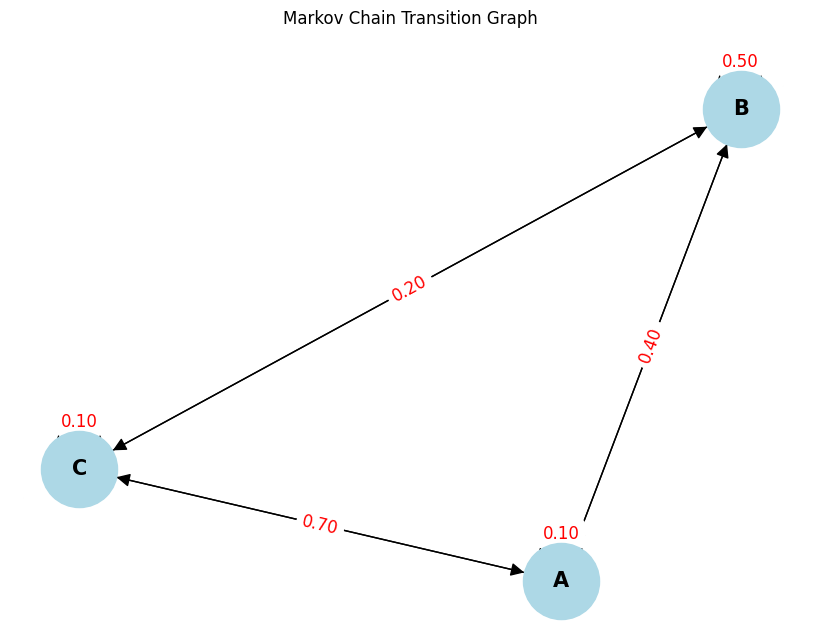

In [14]:

# Visualization Function for the Markov Chain Transition Matrix as a Graph
def visualize_markov_chain(P, states):
    G = nx.DiGraph()  # Create a directed graph

    # Add nodes to the graph
    for state in states:
        G.add_node(state)

    # Add weighted edges to the graph
    for i, from_state in enumerate(states):
        for j, to_state in enumerate(states):
            if P[i, j] > 0:
                G.add_edge(from_state, to_state, weight=P[i, j], label=f'{P[i, j]:.2f}')

    pos = nx.spring_layout(G)  # Layout for visualization
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=15, font_weight='bold', arrowsize=20)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
    plt.title('Markov Chain Transition Graph')
    plt.show()

# Visualize the Markov Chain
visualize_markov_chain(P, states)

In [15]:
# Function to compute the distribution over states after t steps
def state_after_t_steps(initial_distribution, P, t):
    return np.dot(initial_distribution, np.linalg.matrix_power(P, t))

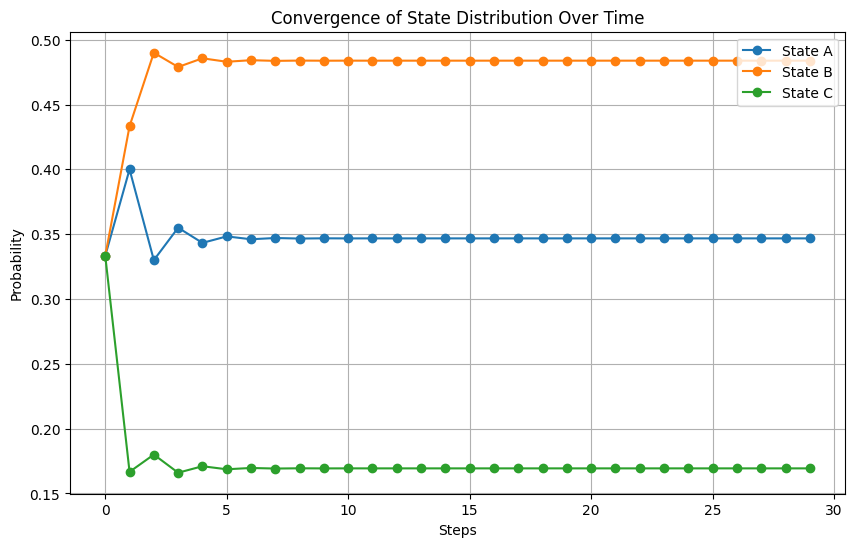

In [13]:
# Visualization of the convergence over time
def visualize_convergence(initial_distribution, P, steps=30):
    state_distributions = []
    for t in range(steps):
        state_distributions.append(state_after_t_steps(initial_distribution, P, t))
    
    state_distributions = np.array(state_distributions)
    
    # Plot convergence
    plt.figure(figsize=(10, 6))
    for i, state in enumerate(states):
        plt.plot(state_distributions[:, i], label=f'State {state}', marker='o')
    
    plt.title('Convergence of State Distribution Over Time')
    plt.xlabel('Steps')
    plt.ylabel('Probability')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

# Visualize the convergence of the state distribution over 30 steps
visualize_convergence(initial_distribution, P, steps=30)

### Convergence:

In a Markov Chain, convergence refers to the idea that as we apply the transition matrix repeatedly, the distribution over states stabilizes to a fixed vector. This vector, known as the **Stationary Distribution**, represents the long-term probabilities of being in each state. Once convergence is achieved, the Markov Chain reaches a steady state where further applications of the transition matrix do not change the distribution.

#### Stationary Distribution:
A **Stationary Distribution** $\pi$ is a probability vector that remains unchanged under the transition matrix $P$. In other words, once the system reaches $\pi$, applying the transition matrix $P$ does not alter the distribution. The stationary distribution satisfies the equation:

A stationary distribution $\pi$ is a probability vector that remains unchanged under the transition:

$$
\pi P = \pi
$$

This means that if the Markov Chain reaches $\pi$, it stays there, indicating convergence. The stationary distribution is the limit of $\pi(t)$ as $t \to \infty$.


In [12]:
# Function to find the stationary distribution
def find_stationary_distribution(P, tol=1e-10):
    n = P.shape[0]
    current_distribution = np.ones(n) / n  # start with a uniform distribution
    while True:
        next_distribution = np.dot(current_distribution, P)
        if np.allclose(next_distribution, current_distribution, atol=tol):
            break
        current_distribution = next_distribution
    return current_distribution

stationary_distribution = find_stationary_distribution(P)
print(f"Stationary distribution: {stationary_distribution}")

Stationary distribution: [0.34677624 0.48386986 0.1693539 ]


### Hitting Probabilities and Hitting Times:

#### Hitting Probability:
$h_{ij}$ is the probability that the chain, starting from state $i$, will eventually reach state $j$.

#### Expected Hitting Time:
The expected hitting time from state $i$ to state $j$, denoted by $E_{ij}$, is the expected number of steps it takes to go from $i$ to $j$.

To compute expected hitting times, you often set up recursive relationships:

$$
E_{ij} = 1 + \sum_k P_{ik} E_{kj} \quad \text{if } i \neq j
$$

This system of equations can be solved numerically or estimated using simulations, as we did.

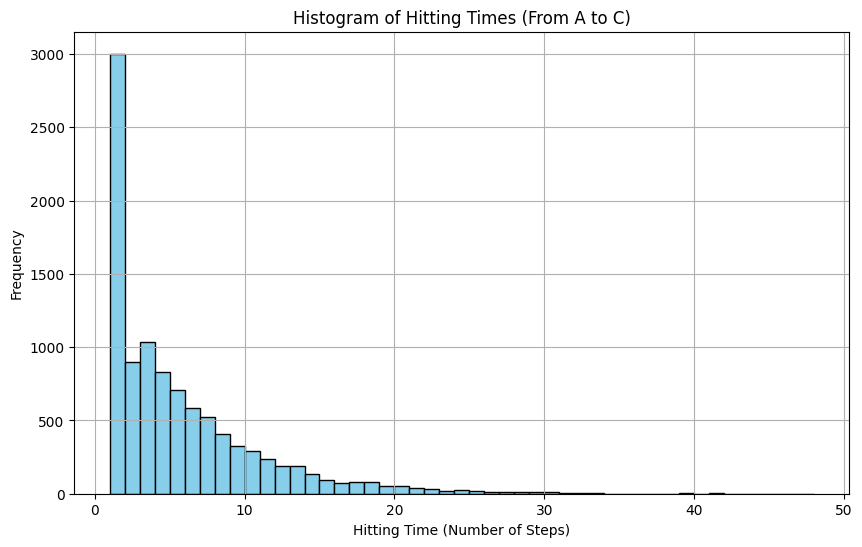

Expected hitting time from A to C: 5.3192


In [11]:
# Expected hitting time simulation
def expected_hitting_time(P, start_state, target_state, num_trials=10000):
    np.random.seed(42)  # For reproducibility
    total_steps = 0
    hitting_times = []
    
    for _ in range(num_trials):
        current_state = start_state
        steps = 0
        while current_state != target_state:
            current_state = np.random.choice(range(len(P)), p=P[current_state])
            steps += 1
        hitting_times.append(steps)
        total_steps += steps
    
    # Plot the histogram of hitting times
    plt.figure(figsize=(10, 6))
    plt.hist(hitting_times, bins=range(1, max(hitting_times)+1), color='skyblue', edgecolor='black')
    plt.title(f'Histogram of Hitting Times (From {states[start_state]} to {states[target_state]})')
    plt.xlabel('Hitting Time (Number of Steps)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
    return total_steps / num_trials

# Calculate expected hitting time from state A (0) to state C (2)
expected_time = expected_hitting_time(P, start_state=0, target_state=2)
print(f"Expected hitting time from A to C: {expected_time}")

### Key Observations

#### X-axis (Hitting Time in Number of Steps)
- The X-axis represents the number of steps it took to move from state A to state C.
- The range goes from 0 up to 50 steps, though most of the data is concentrated in the lower values (0-20).

#### Y-axis (Frequency)
- The Y-axis shows the number of times each hitting time was observed in the simulations.
- For example, the tallest bar reaches just over 3000, indicating that over 3000 simulations hit state C in the smallest number of steps.

#### Shape of the Histogram
- The histogram is right-skewed (or positively skewed), meaning that most of the hitting times are clustered towards the lower end of the X-axis.
- The frequency decreases as the number of steps increases, indicating that hitting state C quickly (in fewer steps) is far more likely than taking a longer path.

### Detailed Analysis

#### Mode (Most Frequent Hitting Time)
- The highest bar is at the far left of the histogram, suggesting that the most common hitting time is very low, probably around 0 or 1 steps.
- This implies that in a significant portion of simulations, state C was reached very quickly from state A.

#### Spread of the Data
- The data is spread out over a range, but the majority of the frequency is concentrated between 0 and around 15 steps.
- After around 15 steps, the frequency of hitting times drops off significantly, showing that it's rare for the Markov Chain to take that many steps to reach state C.

#### Long Tail (Right-Skewness)
- There is a noticeable tail extending to the right (beyond 20 steps), indicating that in some rare cases, it took many more steps (up to 50) to hit state C.
- This shows that while the Markov Chain usually reaches state C quickly, there are occasional longer trajectories.

#### Predictability
- The high peak on the left side suggests that for most trials, reaching state C from A is relatively predictable and tends to happen in fewer steps.
- The presence of the long right tail means that while shorter paths dominate, there's some inherent variability (randomness) in the transitions.

#### Interpreting Why This Happens
- In Markov Chains, shorter hitting times are often more frequent because there might be high-probability paths that lead to the target state quickly.
- The fact that there is a small chance for longer paths suggests that there might be low-probability loops or paths that delay reaching the target.

### Conclusion
- The most likely scenario is that the Markov Chain transitions from A to C in a very short number of steps.
- Occasionally, it might take a longer path, which accounts for the smaller bars further out on the X-axis.
- If you wanted to estimate the expected (average) number of steps from this data, you'd take the weighted mean, accounting for all the frequencies.


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Formalization

## 1. Random Walk

### What is a Random Walk?
A **Random Walk** is a process where you move randomly between states (nodes) in a graph, based on certain probabilities. The idea is that you start at a particular state and, at each step, transition to a neighboring state chosen randomly according to predefined probabilities. Random walks are frequently used in areas like search algorithms, network analysis, and modeling of random processes.

### Formal Definition:
Consider a set of states $S = \{ s_1, s_2, \dots, s_n \}$.  
Let $G = (V, E)$ be a graph where:
- $V$ represents the set of vertices (states), and
- $E$ represents the set of edges indicating which states are connected (neighbors).

A **Random Walk** on this graph is defined by a **transition matrix** $P$, where each entry $P_{ij}$ represents the probability of moving from state $i$ to state $j$ in one step.

### Simple, Unbiased Random Walk:
For a simple, unbiased random walk on a graph, the transition probabilities are uniform among the neighbors. The formula for the transition probabilities is:

$$
P_{ij} = \frac{1}{\deg(i)}
$$

where:
- $P_{ij}$ is the probability of moving from state $i$ to state $j$.
- $\deg(i)$ is the **degree** of node $i$, which is the number of neighbors that $i$ has.
- $P_{ij} = \frac{1}{\deg(i)}$ if $(i, j) \in E$ (i.e., there is an edge between $i$ and $j$).
- $P_{ij} = 0$ if there is no edge between $i$ and $j$.

### Explanation:
- In an unbiased random walk, the walker moves to any of the neighboring nodes with equal probability.
- For example, if a node has 4 neighbors, the probability of moving to any specific neighbor is $\frac{1}{4}$.
  
### Example:
Suppose we have a graph with three states: A, B, and C, connected as follows:
- A is connected to B and C.
- B is connected to A and C.
- C is connected to A and B.

The transition matrix $P$ for this simple, unbiased random walk would be:

$$
P = 
\begin{bmatrix}
    0 & 0.5 & 0.5 \\
    0.5 & 0 & 0.5 \\
    0.5 & 0.5 & 0
\end{bmatrix}
$$

Each entry represents the equal probability of moving from one state to a connected neighbor.


In [27]:
# Function to create a random walk transition matrix on a line graph
def create_random_walk_matrix(n):
    P = np.zeros((n, n))
    for i in range(n):
        if i > 0:
            P[i, i-1] = 0.5  # Probability to move to the left neighbor
        if i < n - 1:
            P[i, i+1] = 0.5  # Probability to move to the right neighbor
    return P


## 2. Lazy Random Walk

### What is a Lazy Random Walk?
A **Lazy Random Walk** is a variation of the random walk where, at each step, there is a chance that the walker "stays" in the current state instead of moving to a neighboring state. This introduces a bias towards not moving, making the walk "lazy." This modification affects the convergence properties of the Markov Chain and is often used to avoid periodicity problems or ensure aperiodicity.

### Formal Definition:
Again, let $G = (V, E)$ be a graph with:
- $V$ representing the set of vertices (states),
- $E$ representing the set of edges indicating which states are neighbors.

The transition matrix $P$ for a lazy random walk is defined as:

$$
P_{ij} = 
\begin{cases}
    \frac{1}{2} & \text{if } i = j \text{ (stay)} \\
    \frac{1}{2} \cdot \frac{1}{\deg(i)} & \text{if } (i, j) \in E \text{ (move)}
\end{cases}
$$

### Explanation:
- There is a $\frac{1}{2}$ probability of staying in the current state.
- There is a $\frac{1}{2}$ probability of moving to a neighboring state.
- If the choice is to move, the selection of a specific neighbor is based on a uniform distribution among the neighbors.

### Example:
Using the same graph with three states: A, B, and C, connected as follows:
- A is connected to B and C.
- B is connected to A and C.
- C is connected to A and B.

The transition matrix $P$ for the lazy random walk would be:

$$
P = 
\begin{bmatrix}
    0.5 & 0.25 & 0.25 \\
    0.25 & 0.5 & 0.25 \\
    0.25 & 0.25 & 0.5
\end{bmatrix}
$$

### Explanation of the Transition Matrix:
- Each diagonal entry ($P_{ii} = 0.5$) indicates a $0.5$ probability of staying in the same state.
- Each off-diagonal entry ($P_{ij} = 0.25$) indicates a $0.25$ probability of moving to a neighboring state.

## Why Use a Lazy Random Walk?
- **Avoiding Periodicity**: A lazy random walk can prevent a Markov Chain from getting stuck in periodic behavior, where the chain revisits states in regular intervals.
- **Ensuring Aperiodicity**: A lazy random walk is always aperiodic, which helps guarantee that the Markov Chain has a unique stationary distribution.
- **Convergence**: Lazy random walks can improve the stability and speed of convergence to a stationary distribution in some cases.


In [28]:
# Function to create a lazy random walk transition matrix on a line graph
def create_lazy_random_walk_matrix(n):
    P = np.zeros((n, n))
    for i in range(n):
        P[i, i] = 0.5  # Probability to stay in the current state
        if i > 0:
            P[i, i-1] = 0.25  # Move to the left neighbor
        if i < n - 1:
            P[i, i+1] = 0.25  # Move to the right neighbor
    return P

In [19]:
# Number of states (line graph with 5 states)
num_states = 5

# Create transition matrices
random_walk_matrix = create_random_walk_matrix(num_states)
lazy_random_walk_matrix = create_lazy_random_walk_matrix(num_states)

print("Random Walk Transition Matrix:")
print(random_walk_matrix)
print("\nLazy Random Walk Transition Matrix:")
print(lazy_random_walk_matrix)

Random Walk Transition Matrix:
[[0.  0.5 0.  0.  0. ]
 [0.5 0.  0.5 0.  0. ]
 [0.  0.5 0.  0.5 0. ]
 [0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.5 0. ]]

Lazy Random Walk Transition Matrix:
[[0.5  0.25 0.   0.   0.  ]
 [0.25 0.5  0.25 0.   0.  ]
 [0.   0.25 0.5  0.25 0.  ]
 [0.   0.   0.25 0.5  0.25]
 [0.   0.   0.   0.25 0.5 ]]


In [20]:
# Visualization of the probability distribution over time for both walks
def simulate_random_walk(P, initial_state, num_steps):
    state_probabilities = np.zeros((num_steps, len(P)))
    current_state = np.zeros(len(P))
    current_state[initial_state] = 1  # Start at the initial state
    state_probabilities[0] = current_state
    
    for step in range(1, num_steps):
        current_state = np.dot(current_state, P)
        state_probabilities[step] = current_state
        
    return state_probabilities

In [22]:
# Simulate both random walks
initial_state = 2  # Start in the middle state
num_steps = 20

random_walk_probs = simulate_random_walk(random_walk_matrix, initial_state, num_steps)
lazy_random_walk_probs = simulate_random_walk(lazy_random_walk_matrix, initial_state, num_steps)

In [24]:
# Plotting the evolution of the state probabilities over time
def plot_probabilities(probs, title):
    plt.figure(figsize=(10, 6))
    for state in range(probs.shape[1]):
        plt.plot(probs[:, state], label=f'State {state}')
    plt.title(title)
    plt.xlabel('Steps')
    plt.ylabel('Probability')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()


#### Key Properties of a Random Walk:
1. **Unbiased Movement**: If the graph is undirected (no direction on edges), the walk is unbiased — meaning you have an equal chance of moving to any neighboring state.
2. **Markovian Property**: A random walk is a type of Markov Chain, which means it is **memoryless**. The next state depends only on the current state, not on the history of states.
3. **Connected Graphs**: In most random walk scenarios, we assume the graph is connected, meaning there is a path between any pair of states. This ensures the walk can eventually visit any state.

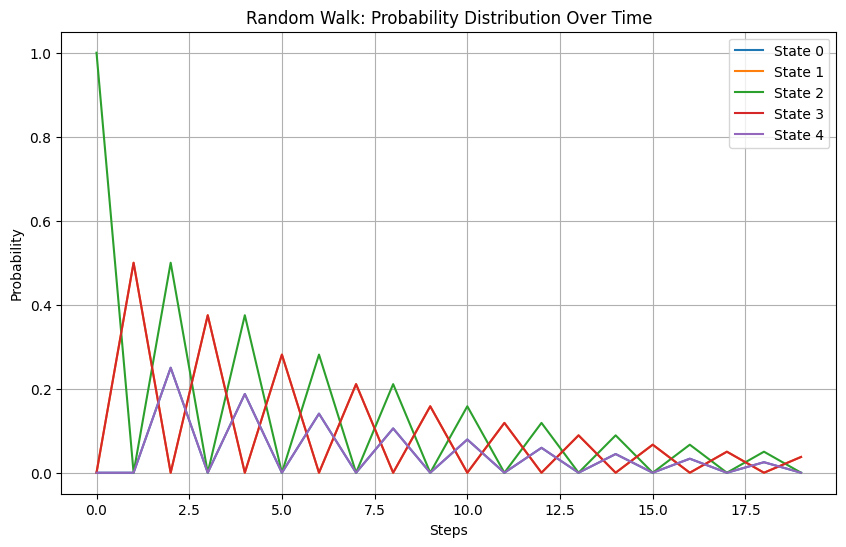

In [25]:
# Plot the evolution for Random Walk and Lazy Random Walk
plot_probabilities(random_walk_probs, 'Random Walk: Probability Distribution Over Time')


### Applications of Random Walks:
1. **Web Page Ranking (Google's PageRank)**: A random walk on the web graph is used to rank web pages based on the likelihood of a random surfer visiting them.
2. **Network Analysis**: Random walks are used to study properties of networks like social networks or biological networks.
3. **Sampling**: In statistics, random walks help sample from complex distributions (e.g., Markov Chain Monte Carlo).

### Why Use a Lazy Random Walk?
1. **Avoiding Periodicity**: A regular random walk might revisit states in a cyclic pattern, leading to periodic behavior. The lazy random walk helps avoid this by allowing the chain to pause in a state.
2. **Ensuring Aperiodicity**: A lazy random walk is inherently aperiodic, which guarantees that the Markov Chain has a unique stationary distribution.
3. **Stability in Convergence**: Lazy random walks can converge more smoothly to a stationary distribution, particularly in regular or structured graphs.


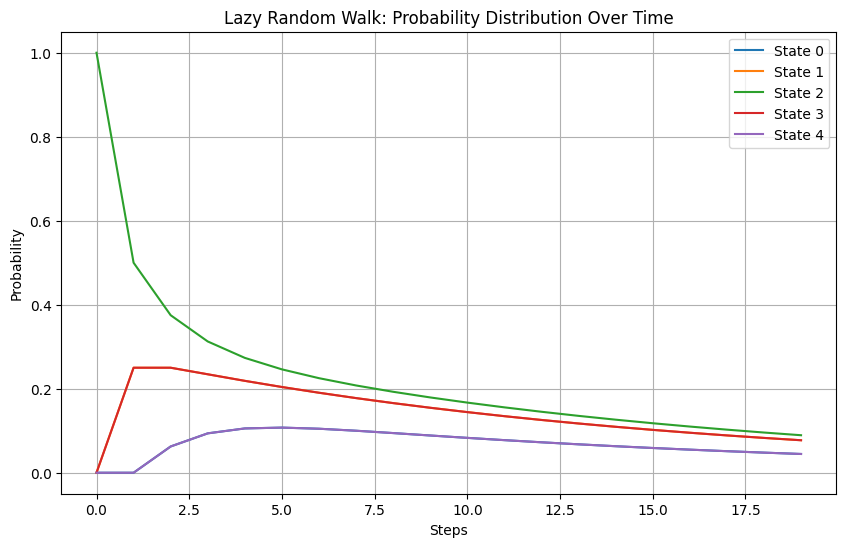

In [26]:
plot_probabilities(lazy_random_walk_probs, 'Lazy Random Walk: Probability Distribution Over Time')

### Applications of Lazy Random Walks:
1. **Markov Chain Monte Carlo (MCMC)**: Lazy random walks are used to ensure convergence to a stationary distribution in MCMC sampling.
2. **PageRank Variants**: Variations of the lazy random walk are used in personalized ranking algorithms.
3. **Stochastic Processes**: Lazy random walks are utilized in various stochastic modeling scenarios to stabilize the random processes.

## Summary:
- A **Random Walk** is a simple Markov process where you move between neighboring states randomly.
- A **Lazy Random Walk** introduces a bias to stay in the current state with some probability (e.g., $0.5$), which changes the behavior of the Markov Chain.
- In a random walk, transition probabilities are uniform among neighbors.
- In a lazy random walk, there's an additional probability of staying in the current state, affecting the convergence and aperiodicity of the Markov Chain.

# Key Types of Centralities in Networks

## 1. Degree Centrality
### Definition:
**Degree Centrality** measures the importance of a node based on the number of direct connections (edges) it has. In an undirected graph, it's simply the count of edges attached to the node. In a directed graph, it is separated into:
- **In-degree**: Number of incoming connections.
- **Out-degree**: Number of outgoing connections.

### Formula:
For a node $v$, the degree centrality $C_D(v)$ is given by:

$$
C_D(v) = \deg(v)
$$

Where:
- $C_D(v)$ is the degree centrality of node $v$.
- $\deg(v)$ is the number of edges connected to node $v$.

### Interpretation:
- Nodes with high degree centrality are **highly connected** and can act as hubs.
- In social networks, they are often **influential or popular** individuals.
- In computer or physical networks, they indicate **high-connectivity hubs**.

### Example Use:
- Identifying individuals in a social network with the most friends.
- Finding hubs in a transport network, like major airports.

## 2. Betweenness Centrality
### Definition:
**Betweenness Centrality** measures the importance of a node as a bridge or connector between other nodes. It is calculated based on how often a node appears on the shortest paths (geodesic paths) between other nodes.

### Formula:
For a node $v$, the betweenness centrality $C_B(v)$ is given by:

$$
C_B(v) = \sum_{s \neq v \neq t} \frac{\sigma_{st}(v)}{\sigma_{st}}
$$

Where:
- $C_B(v)$ is the betweenness centrality of node $v$.
- $\sigma_{st}$ is the total number of shortest paths from node $s$ to node $t$.
- $\sigma_{st}(v)$ is the number of those shortest paths that pass through node $v$.

### Interpretation:
- Nodes with high betweenness centrality **control the flow of information** in a network.
- These nodes can be **bottlenecks** or **critical points** in the network.
- Removing them can **fragment the network**, causing connectivity issues.

### Example Use:
- Identifying influential people in a communication network.
- Finding weaknesses in a network (potential single points of failure).

## 3. Closeness Centrality
### Definition:
**Closeness Centrality** measures how close a node is to all other nodes in the network, based on the shortest paths. A node with high closeness centrality can reach other nodes quickly.

### Formula:
For a node $v$, the closeness centrality $C_C(v)$ is given by:

$$
C_C(v) = \frac{1}{\sum_u d(v, u)}
$$

Where:
- $C_C(v)$ is the closeness centrality of node $v$.
- $d(v, u)$ is the shortest path distance between nodes $v$ and $u$.

### Interpretation:
- High closeness centrality indicates that a node has **efficient access** to the entire network.
- It is useful for understanding the **speed of information spread** in a network.

### Example Use:
- Finding people in a social network who can efficiently disseminate information.
- Identifying central nodes in transportation networks for quick access to other locations.

## 4. Eigenvector Centrality
### Definition:
**Eigenvector Centrality** measures a node's influence based on the importance of its neighbors. A node is considered important if it is connected to other influential nodes. It is a **recursive measure**, unlike degree centrality, because it factors in the quality of connections.

### Formula:
The centrality values are derived from the eigenvector equation:

$$
Ax = \lambda x
$$

Where:
- $A$ is the adjacency matrix of the graph.
- $x$ is the eigenvector corresponding to the largest eigenvalue $\lambda$.

### Interpretation:
- Nodes with high eigenvector centrality are connected to other **highly influential nodes**.
- It goes beyond counting connections and considers the **influence of neighbors**.

### Example Use:
- Ranking web pages (like Google's PageRank).
- Identifying influential people in social networks connected to other influencers.

## 5. PageRank
### Definition:
**PageRank** is a variant of eigenvector centrality that uses a random walk model to determine the importance of nodes. It assigns higher importance to nodes that receive links from other important nodes. It was originally designed by Google for web page ranking.

### How It Works:
- A "random surfer" model: The surfer randomly moves between nodes (pages).
- The importance of a node is proportional to the probability of landing on it.
- A damping factor (typically 0.85) accounts for the probability of randomly jumping to another node.

### Interpretation:
- Useful for understanding **relative importance** in directed networks.
- Highlights nodes that have many incoming connections from other significant nodes.

### Example Use:
- Ranking websites based on their relevance and popularity.
- Finding influential academic papers based on citation networks.


In [29]:
import networkx as nx
import matplotlib.pyplot as plt

In [30]:
# Function to plot graph and centralities
def plot_graph_centralities(G, centralities, title):
    plt.figure(figsize=(12, 8))
    
    # Layout for visualization
    pos = nx.spring_layout(G, seed=42)  # Fixed layout for reproducibility
    
    # Draw nodes
    nodes = nx.draw_networkx_nodes(G, pos, node_size=500, cmap=plt.cm.plasma, 
                                   node_color=list(centralities.values()), 
                                   nodelist=centralities.keys())
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    
    # Labels
    labels = {node: f'{node}\n{centralities[node]:.2f}' for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)
    
    # Colorbar
    plt.colorbar(nodes)
    plt.title(title)
    plt.show()

In [31]:
# Generate Different Graphs
def create_graphs():
    # Random Graph (Erdős–Rényi)
    random_graph = nx.erdos_renyi_graph(10, 0.3, seed=42)
    
    # Scale-Free Graph (Barabási–Albert)
    scale_free_graph = nx.barabasi_albert_graph(10, 2, seed=42)
    
    # Grid Graph
    grid_graph = nx.grid_2d_graph(3, 3)
    
    # Small-World Graph (Watts-Strogatz)
    small_world_graph = nx.watts_strogatz_graph(10, 4, 0.3, seed=42)
    
    # Tree Graph
    tree_graph = nx.balanced_tree(2, 3)
    
    return {
        "Random Graph": random_graph,
        "Scale-Free Graph": scale_free_graph,
        "Grid Graph": grid_graph,
        "Small-World Graph": small_world_graph,
        "Tree Graph": tree_graph
    }

In [32]:
# Centrality Analysis
def analyze_centralities(graphs):
    for graph_name, G in graphs.items():
        print(f"\nAnalyzing Centralities for {graph_name}:\n")
        
        # Degree Centrality
        degree_centrality = nx.degree_centrality(G)
        print(f"Degree Centrality: {degree_centrality}")
        plot_graph_centralities(G, degree_centrality, f"{graph_name} - Degree Centrality")
        
        # Betweenness Centrality
        betweenness_centrality = nx.betweenness_centrality(G)
        print(f"Betweenness Centrality: {betweenness_centrality}")
        plot_graph_centralities(G, betweenness_centrality, f"{graph_name} - Betweenness Centrality")
        
        # Closeness Centrality
        closeness_centrality = nx.closeness_centrality(G)
        print(f"Closeness Centrality: {closeness_centrality}")
        plot_graph_centralities(G, closeness_centrality, f"{graph_name} - Closeness Centrality")
        
        # Eigenvector Centrality
        try:
            eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
            print(f"Eigenvector Centrality: {eigenvector_centrality}")
            plot_graph_centralities(G, eigenvector_centrality, f"{graph_name} - Eigenvector Centrality")
        except nx.PowerIterationFailedConvergence:
            print("Eigenvector Centrality: Convergence failed.")
        
        # PageRank
        pagerank = nx.pagerank(G)
        print(f"PageRank: {pagerank}")
        plot_graph_centralities(G, pagerank, f"{graph_name} - PageRank")


Analyzing Centralities for Random Graph:

Degree Centrality: {0: 0.4444444444444444, 1: 0.5555555555555556, 2: 0.4444444444444444, 3: 0.4444444444444444, 4: 0.1111111111111111, 5: 0.2222222222222222, 6: 0.3333333333333333, 7: 0.3333333333333333, 8: 0.3333333333333333, 9: 0.5555555555555556}


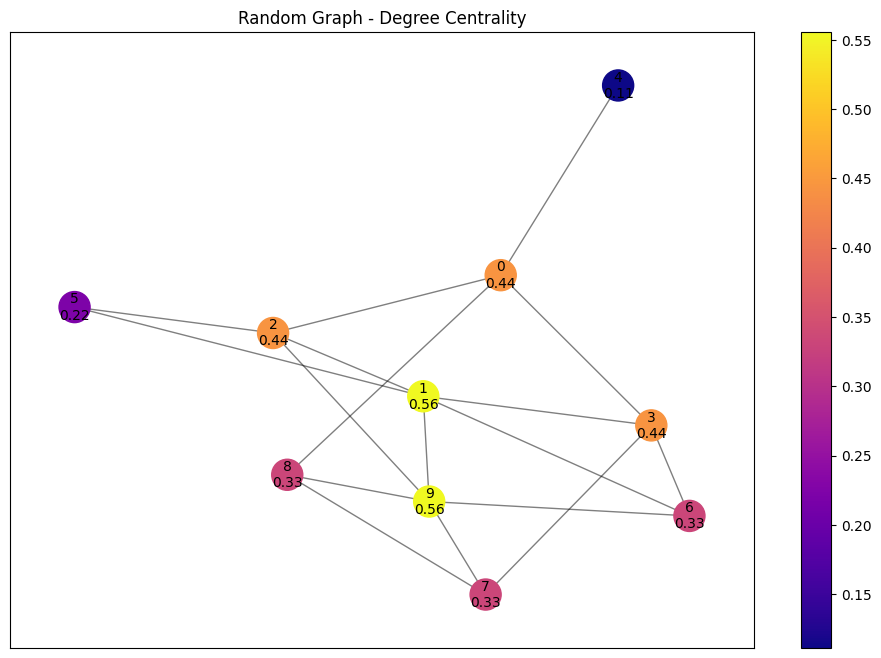

Betweenness Centrality: {0: 0.27314814814814814, 1: 0.13425925925925927, 2: 0.15277777777777776, 3: 0.1481481481481481, 4: 0.0, 5: 0.0, 6: 0.009259259259259259, 7: 0.023148148148148143, 8: 0.05555555555555555, 9: 0.1759259259259259}


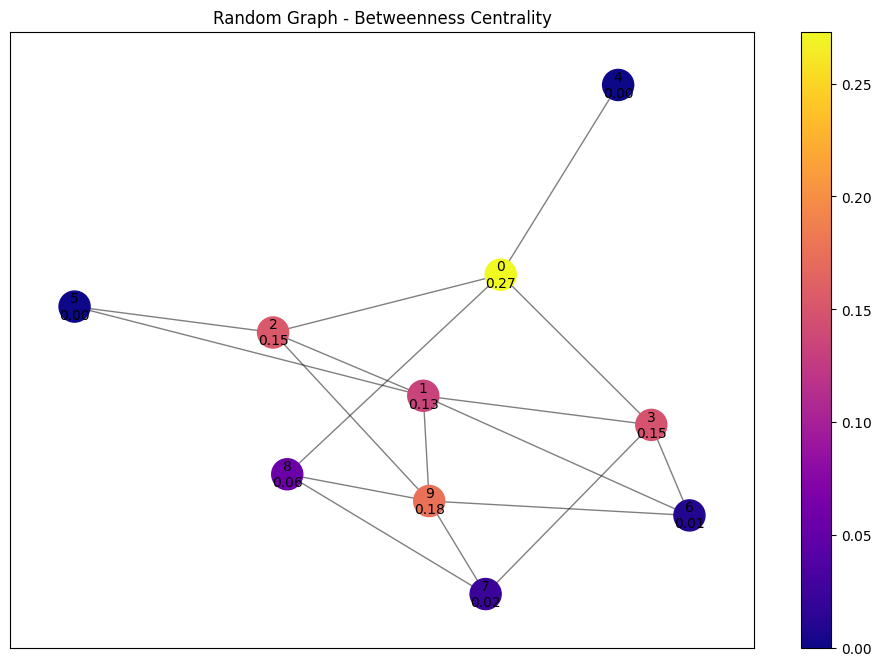

Closeness Centrality: {0: 0.6428571428571429, 1: 0.6428571428571429, 2: 0.6428571428571429, 3: 0.6428571428571429, 4: 0.4090909090909091, 5: 0.47368421052631576, 6: 0.5625, 7: 0.5294117647058824, 8: 0.5625, 9: 0.6428571428571429}


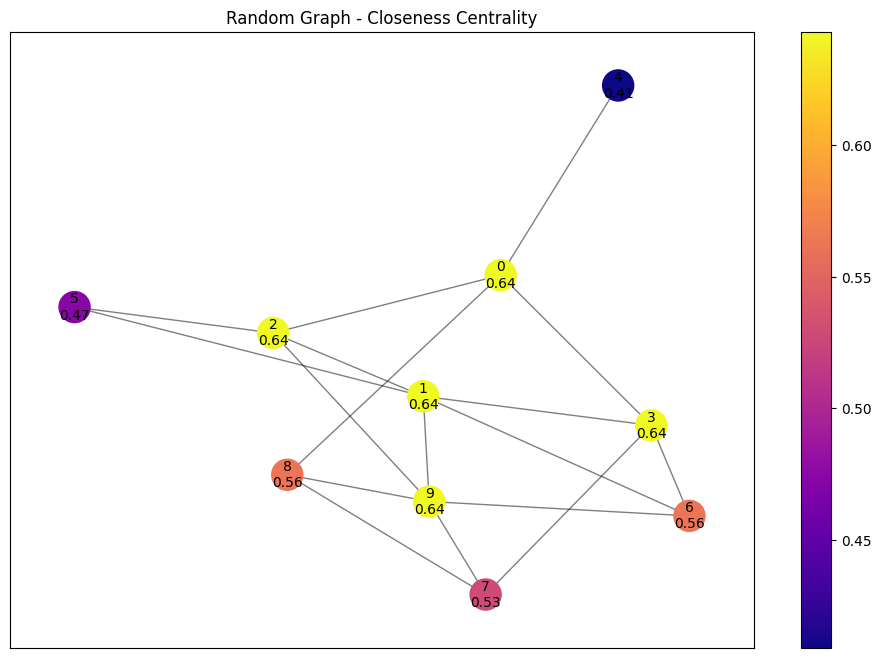

Eigenvector Centrality: {0: 0.2723961473043755, 1: 0.44034231687522696, 2: 0.35812170354514683, 3: 0.34483412065771296, 4: 0.0717918251133456, 5: 0.21043891018429733, 6: 0.3217508623854769, 7: 0.27390378385095326, 8: 0.2587946357255212, 9: 0.435634127194141}


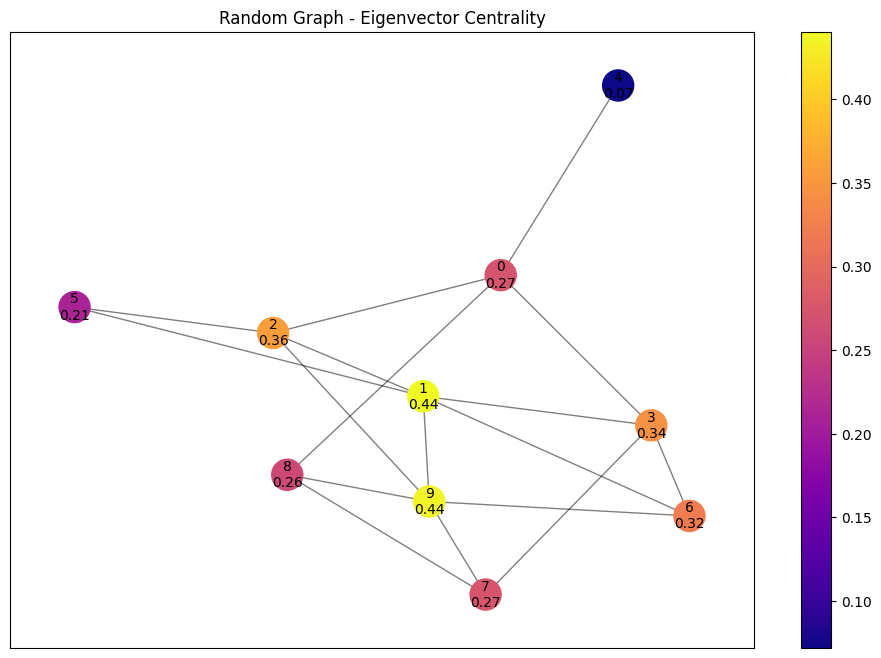

PageRank: {0: 0.12456262236324774, 1: 0.13855322682035037, 2: 0.1152821115855633, 3: 0.11450004999239818, 4: 0.041469147470631504, 5: 0.06305162305249128, 6: 0.08634761260956668, 7: 0.08827779672524488, 8: 0.08994309969056995, 9: 0.13801270968993615}


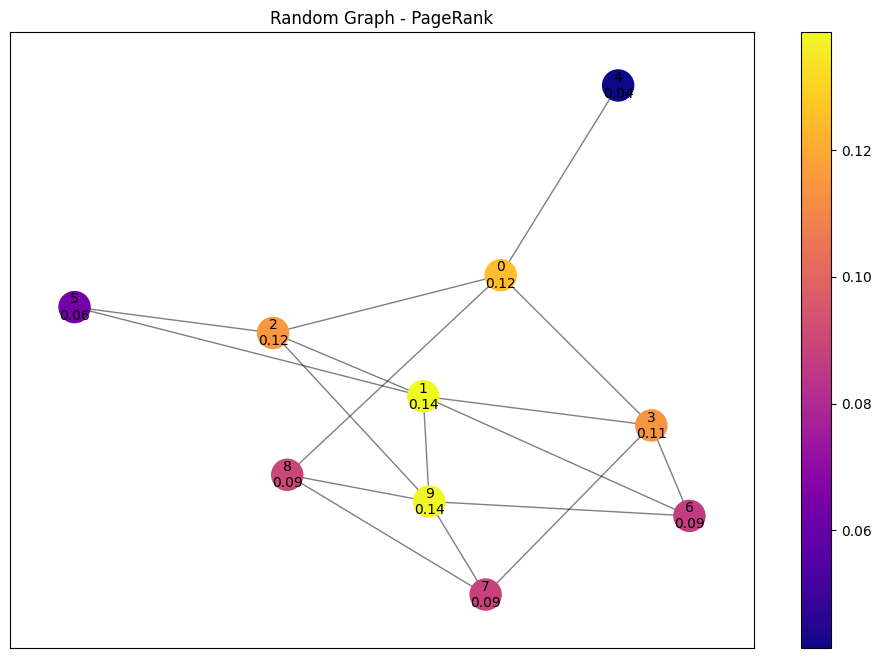


Analyzing Centralities for Scale-Free Graph:

Degree Centrality: {0: 0.6666666666666666, 1: 0.6666666666666666, 2: 0.2222222222222222, 3: 0.3333333333333333, 4: 0.4444444444444444, 5: 0.2222222222222222, 6: 0.3333333333333333, 7: 0.2222222222222222, 8: 0.2222222222222222, 9: 0.2222222222222222}


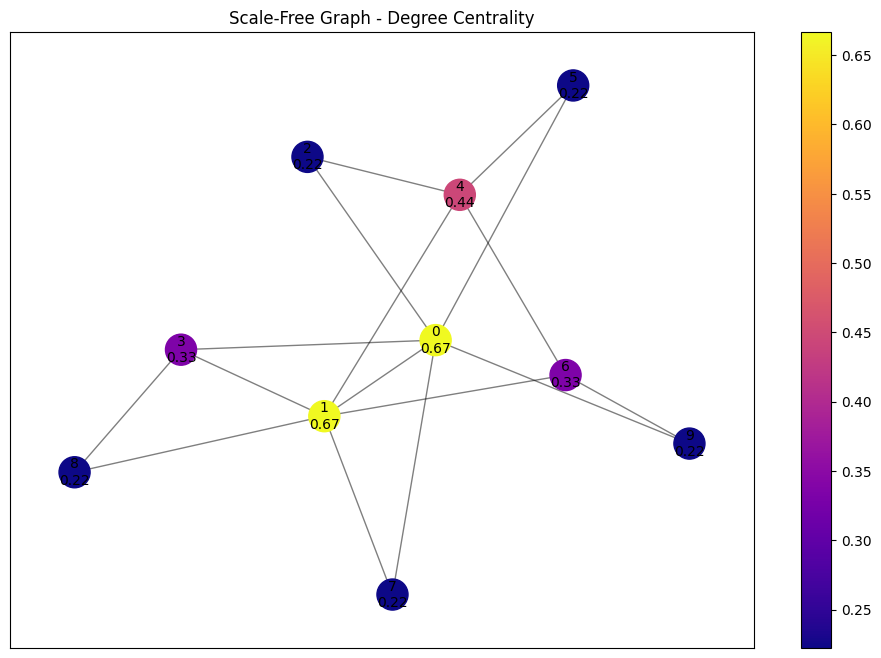

Betweenness Centrality: {0: 0.3472222222222222, 1: 0.30092592592592593, 2: 0.009259259259259259, 3: 0.041666666666666664, 4: 0.11574074074074071, 5: 0.009259259259259259, 6: 0.05092592592592592, 7: 0.0, 8: 0.0, 9: 0.013888888888888888}


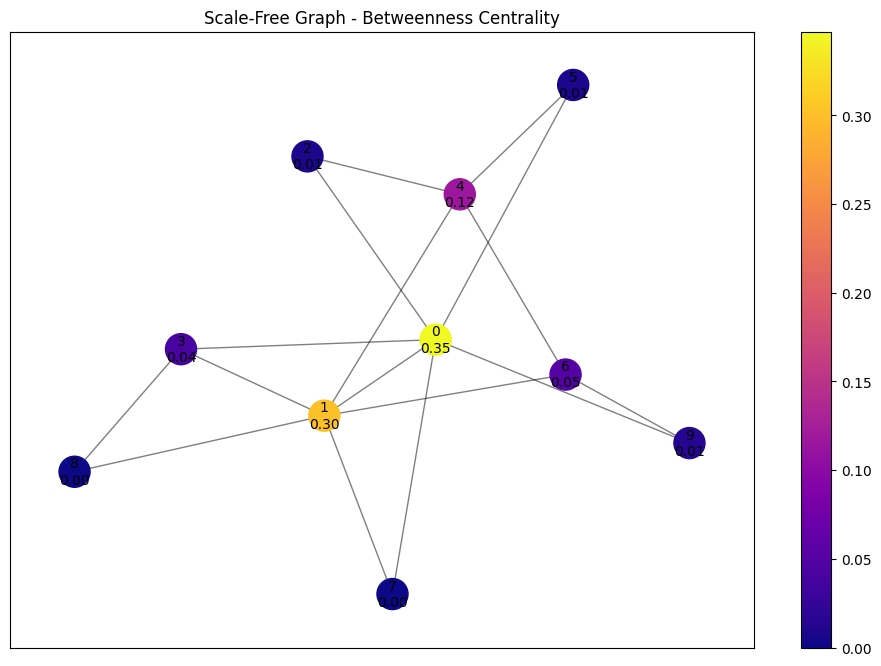

Closeness Centrality: {0: 0.75, 1: 0.75, 2: 0.5294117647058824, 3: 0.6, 4: 0.6428571428571429, 5: 0.5294117647058824, 6: 0.6, 7: 0.5625, 8: 0.47368421052631576, 9: 0.5294117647058824}


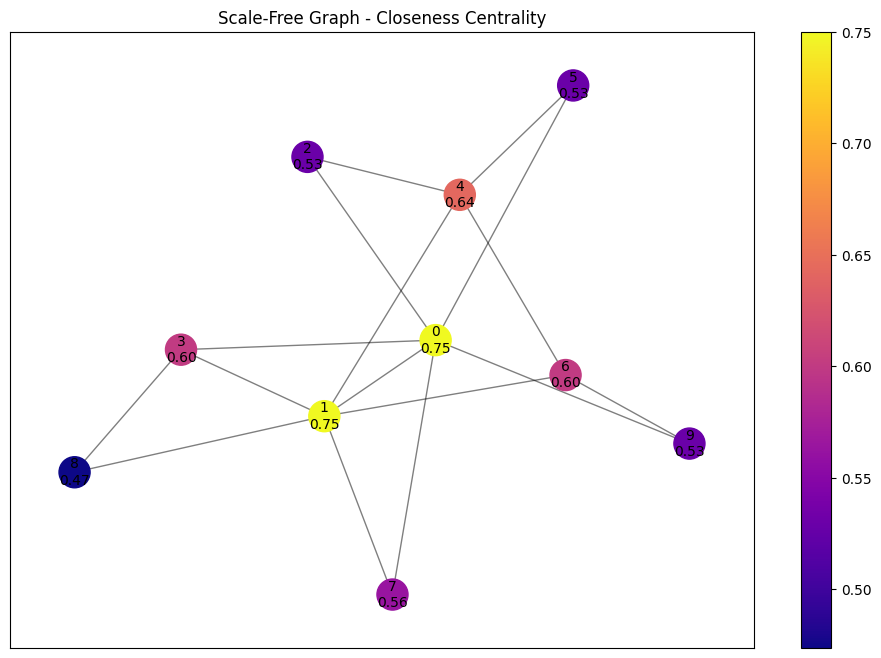

Eigenvector Centrality: {0: 0.46122714585167207, 1: 0.504100805407592, 2: 0.2123174438238056, 3: 0.32054680067139013, 4: 0.32556005258186044, 5: 0.2123174438238056, 6: 0.2776959558582438, 7: 0.2604962904952724, 8: 0.22253270014028786, 9: 0.19940095501745173}


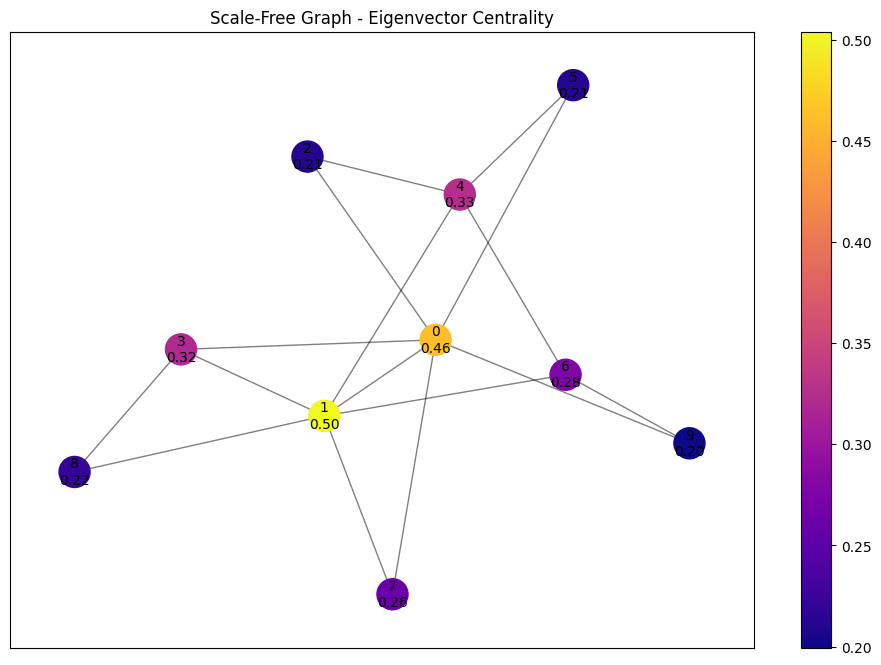

PageRank: {0: 0.17953185911676428, 1: 0.17609412879553715, 2: 0.06667099658853057, 3: 0.09363225888538781, 4: 0.12347301178282648, 5: 0.06667099658853057, 6: 0.09478223187937876, 7: 0.06538011511488614, 8: 0.0664761293702669, 9: 0.06728827187789137}


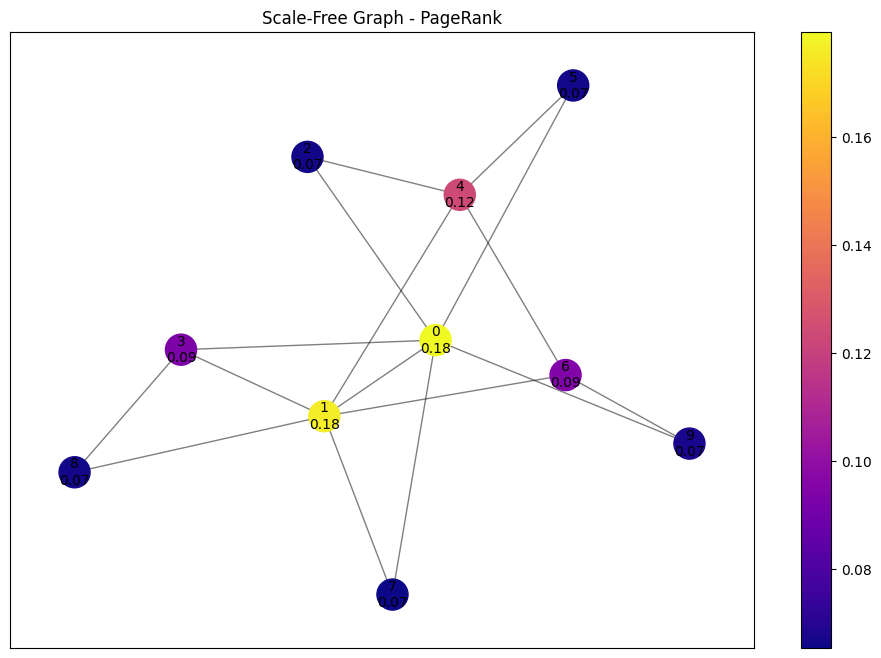


Analyzing Centralities for Grid Graph:

Degree Centrality: {(0, 0): 0.25, (0, 1): 0.375, (0, 2): 0.25, (1, 0): 0.375, (1, 1): 0.5, (1, 2): 0.375, (2, 0): 0.25, (2, 1): 0.375, (2, 2): 0.25}


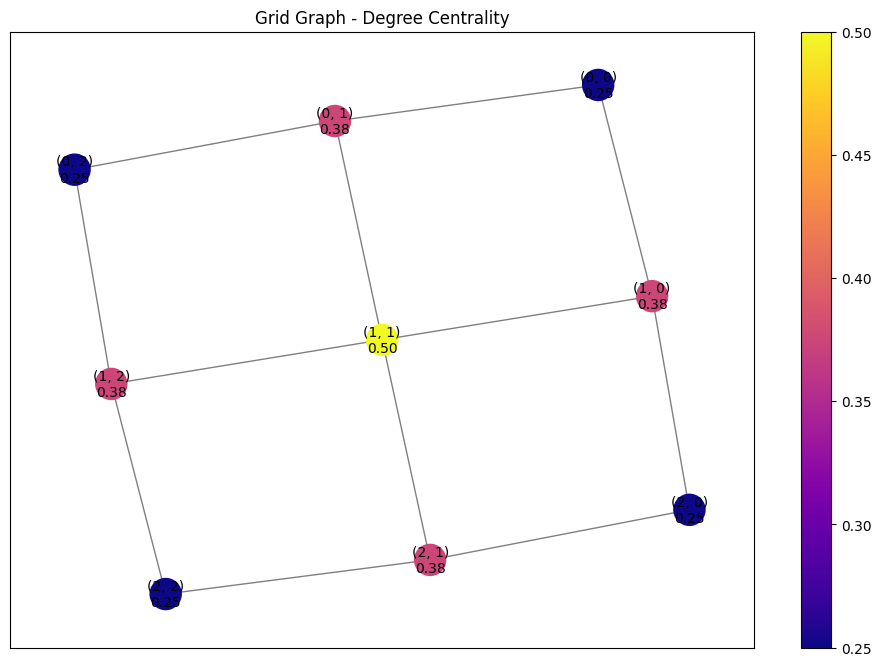

Betweenness Centrality: {(0, 0): 0.047619047619047616, (0, 1): 0.17857142857142855, (0, 2): 0.047619047619047616, (1, 0): 0.17857142857142852, (1, 1): 0.38095238095238093, (1, 2): 0.17857142857142855, (2, 0): 0.047619047619047616, (2, 1): 0.17857142857142855, (2, 2): 0.047619047619047616}


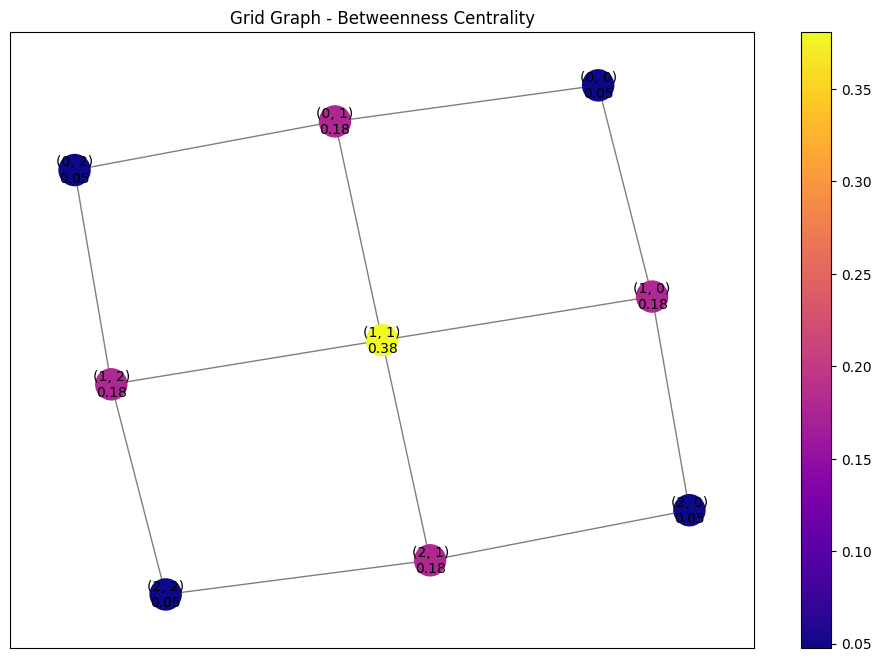

Closeness Centrality: {(0, 0): 0.4444444444444444, (0, 1): 0.5333333333333333, (0, 2): 0.4444444444444444, (1, 0): 0.5333333333333333, (1, 1): 0.6666666666666666, (1, 2): 0.5333333333333333, (2, 0): 0.4444444444444444, (2, 1): 0.5333333333333333, (2, 2): 0.4444444444444444}


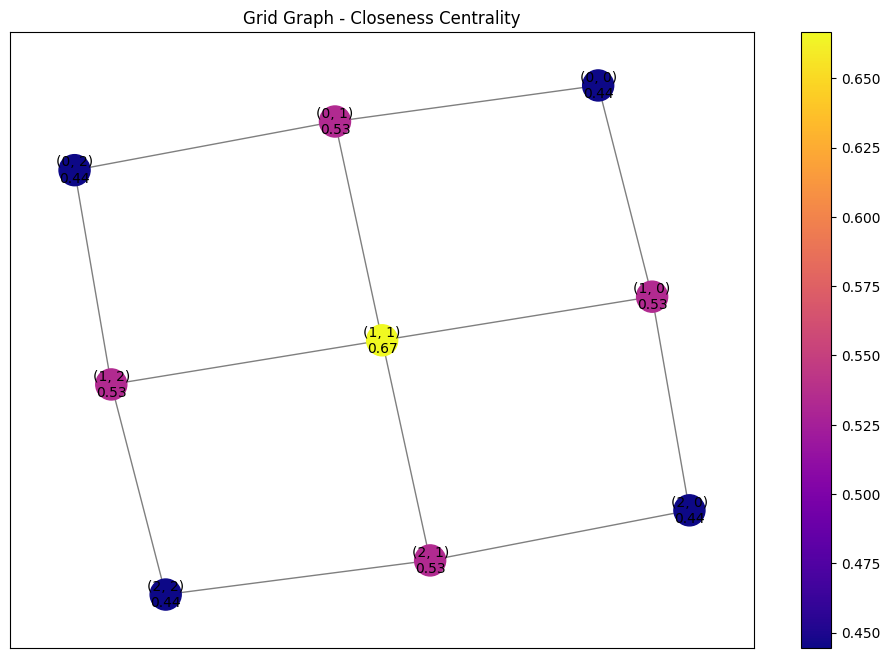

Eigenvector Centrality: {(0, 0): 0.250000236985691, (0, 1): 0.3535530562795058, (0, 2): 0.250000236985691, (1, 0): 0.3535530562795058, (1, 1): 0.5000004716098532, (1, 2): 0.3535530562795058, (2, 0): 0.250000236985691, (2, 1): 0.3535530562795058, (2, 2): 0.250000236985691}


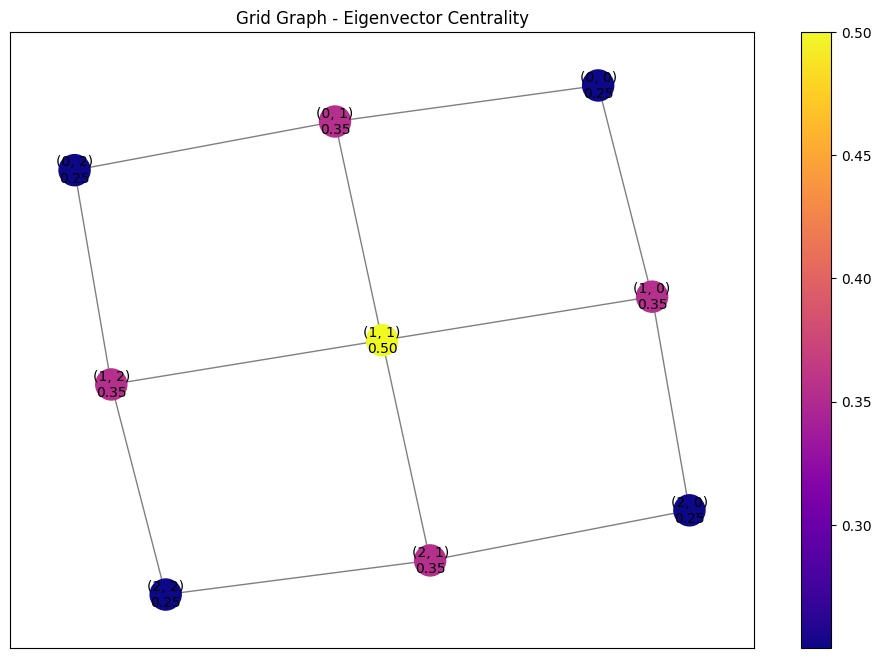

PageRank: {(0, 0): 0.08686155760123374, (0, 1): 0.12387433026481603, (0, 2): 0.08686155760123374, (1, 0): 0.12387433026481603, (1, 1): 0.1570564485358008, (1, 2): 0.12387433026481603, (2, 0): 0.08686155760123374, (2, 1): 0.12387433026481603, (2, 2): 0.08686155760123374}


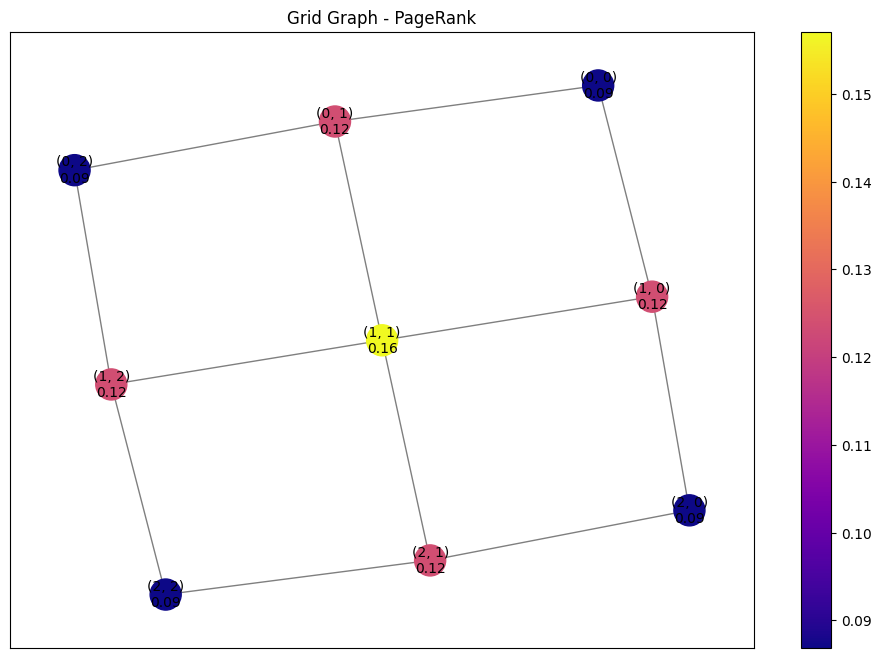


Analyzing Centralities for Small-World Graph:

Degree Centrality: {0: 0.6666666666666666, 1: 0.6666666666666666, 2: 0.3333333333333333, 3: 0.4444444444444444, 4: 0.5555555555555556, 5: 0.4444444444444444, 6: 0.4444444444444444, 7: 0.2222222222222222, 8: 0.3333333333333333, 9: 0.3333333333333333}


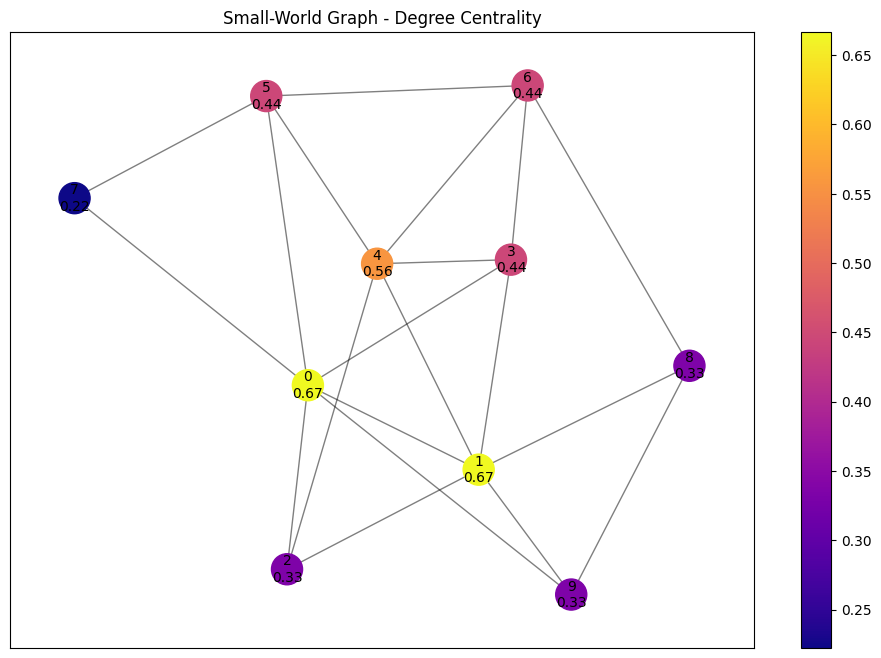

Betweenness Centrality: {0: 0.23148148148148143, 1: 0.15046296296296294, 2: 0.006944444444444444, 3: 0.030092592592592587, 4: 0.08333333333333331, 5: 0.08564814814814814, 6: 0.07407407407407407, 7: 0.0, 8: 0.037037037037037035, 9: 0.023148148148148143}


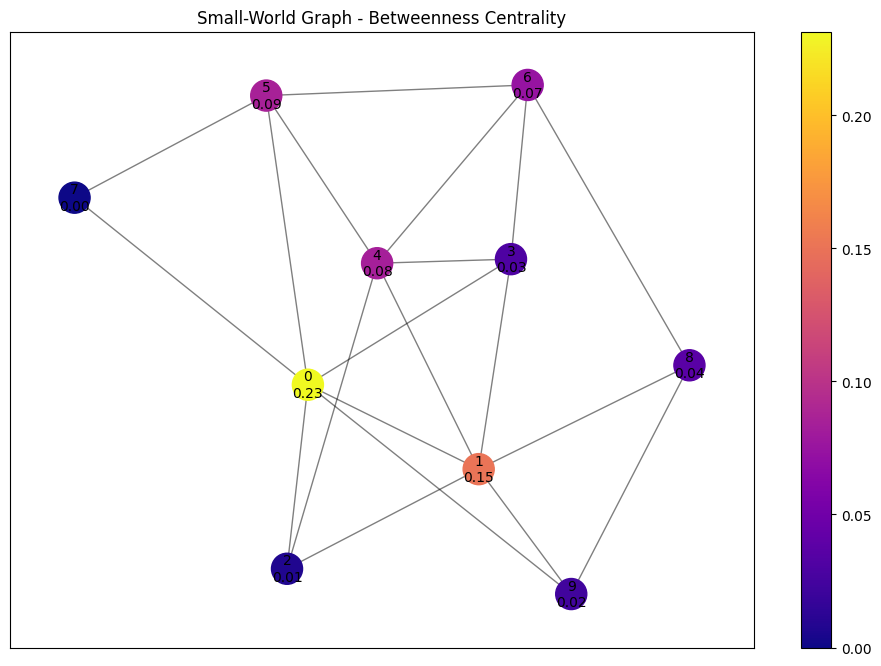

Closeness Centrality: {0: 0.75, 1: 0.75, 2: 0.6, 3: 0.6428571428571429, 4: 0.6923076923076923, 5: 0.6428571428571429, 6: 0.6428571428571429, 7: 0.5294117647058824, 8: 0.5625, 9: 0.6}


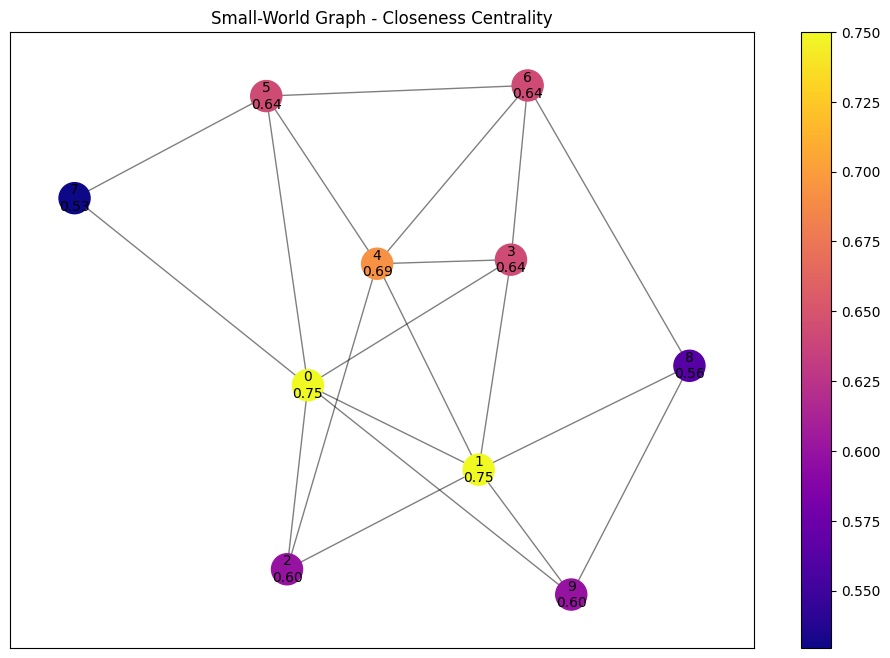

Eigenvector Centrality: {0: 0.4066822058674881, 1: 0.4364061339012385, 2: 0.28252074178369224, 3: 0.3486082974761693, 4: 0.3787512266719341, 5: 0.2846645479293228, 6: 0.28581276073550554, 7: 0.1598583478135133, 8: 0.22404984024571362, 9: 0.24674926967377092}


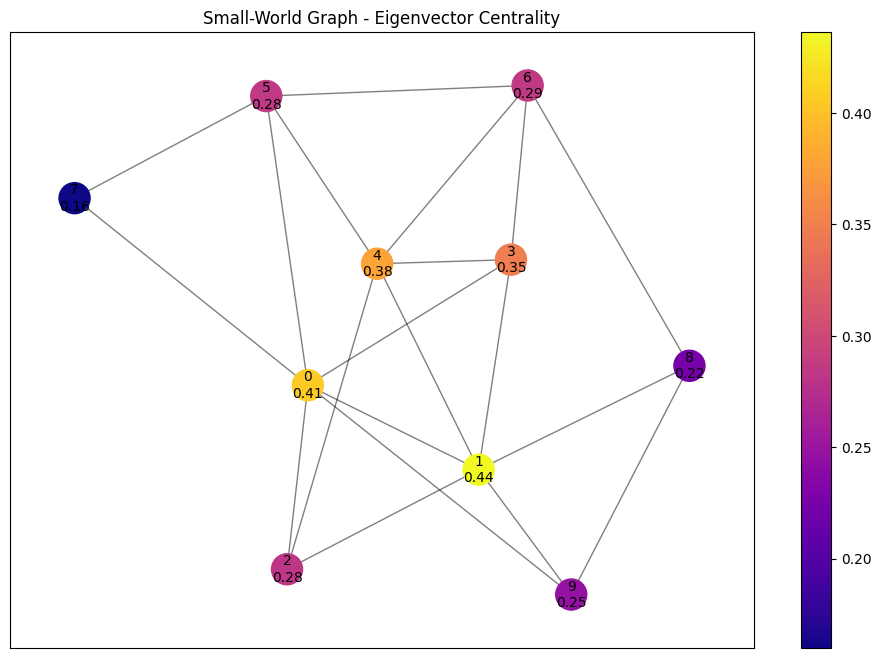

PageRank: {0: 0.14584566033928872, 1: 0.14306608796572845, 2: 0.07643581865098226, 3: 0.0977319794840206, 4: 0.12062368928411367, 5: 0.10181550170730534, 6: 0.10021657047182016, 7: 0.05729730869327883, 8: 0.07873077049796698, 9: 0.07823661290549488}


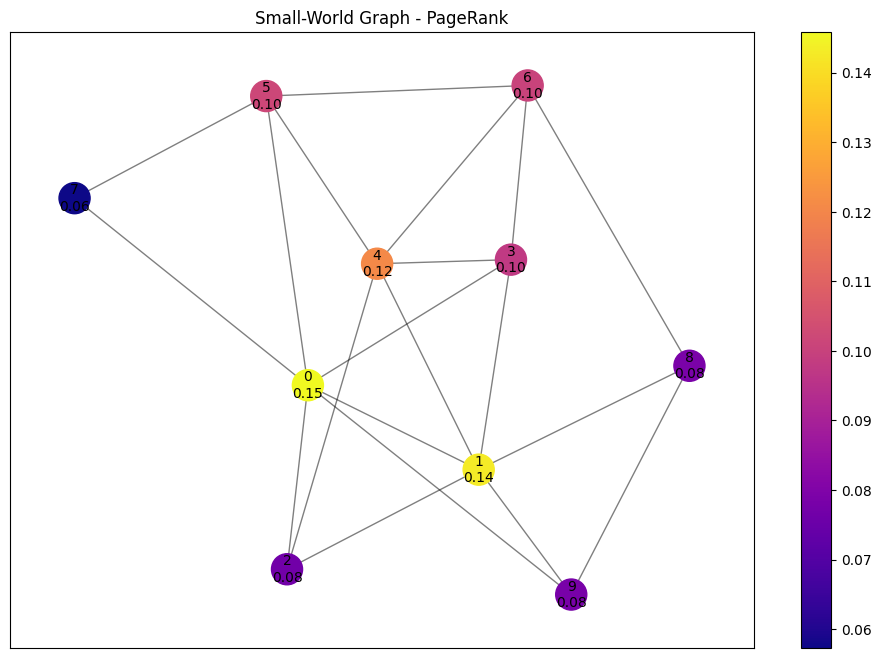


Analyzing Centralities for Tree Graph:

Degree Centrality: {0: 0.14285714285714285, 1: 0.21428571428571427, 2: 0.21428571428571427, 3: 0.21428571428571427, 4: 0.21428571428571427, 5: 0.21428571428571427, 6: 0.21428571428571427, 7: 0.07142857142857142, 8: 0.07142857142857142, 9: 0.07142857142857142, 10: 0.07142857142857142, 11: 0.07142857142857142, 12: 0.07142857142857142, 13: 0.07142857142857142, 14: 0.07142857142857142}


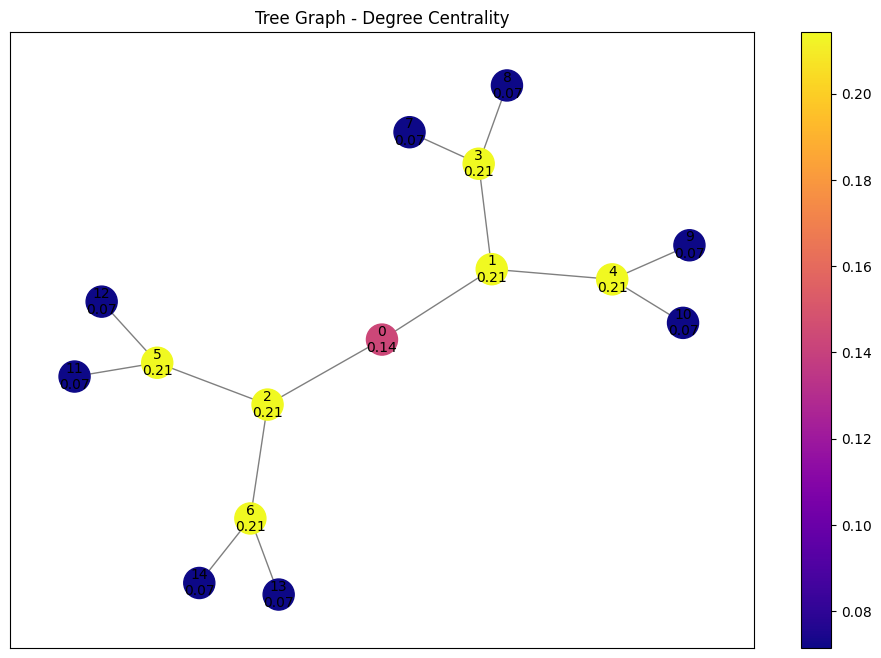

Betweenness Centrality: {0: 0.5384615384615385, 1: 0.6263736263736264, 2: 0.6263736263736264, 3: 0.27472527472527475, 4: 0.27472527472527475, 5: 0.27472527472527475, 6: 0.27472527472527475, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0}


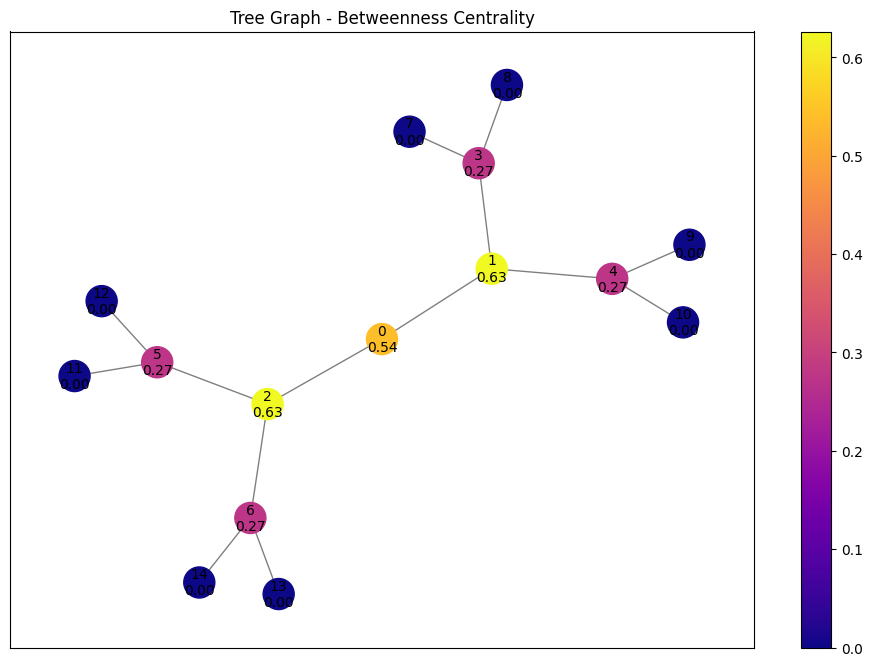

Closeness Centrality: {0: 0.4117647058823529, 1: 0.4, 2: 0.4, 3: 0.3181818181818182, 4: 0.3181818181818182, 5: 0.3181818181818182, 6: 0.3181818181818182, 7: 0.24561403508771928, 8: 0.24561403508771928, 9: 0.24561403508771928, 10: 0.24561403508771928, 11: 0.24561403508771928, 12: 0.24561403508771928, 13: 0.24561403508771928, 14: 0.24561403508771928}


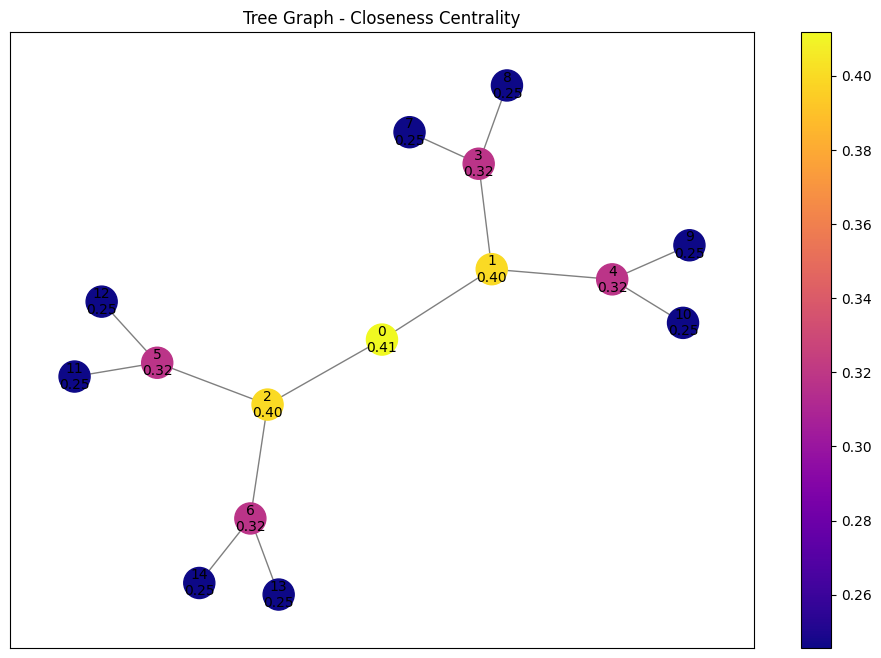

Eigenvector Centrality: {0: 0.3717450551619562, 1: 0.42532410257328757, 2: 0.42532410257328757, 3: 0.30075139786851424, 4: 0.30075139786851424, 5: 0.30075139786851424, 6: 0.30075139786851424, 7: 0.1314338313675497, 8: 0.1314338313675497, 9: 0.1314338313675497, 10: 0.1314338313675497, 11: 0.1314338313675497, 12: 0.1314338313675497, 13: 0.1314338313675497, 14: 0.1314338313675497}


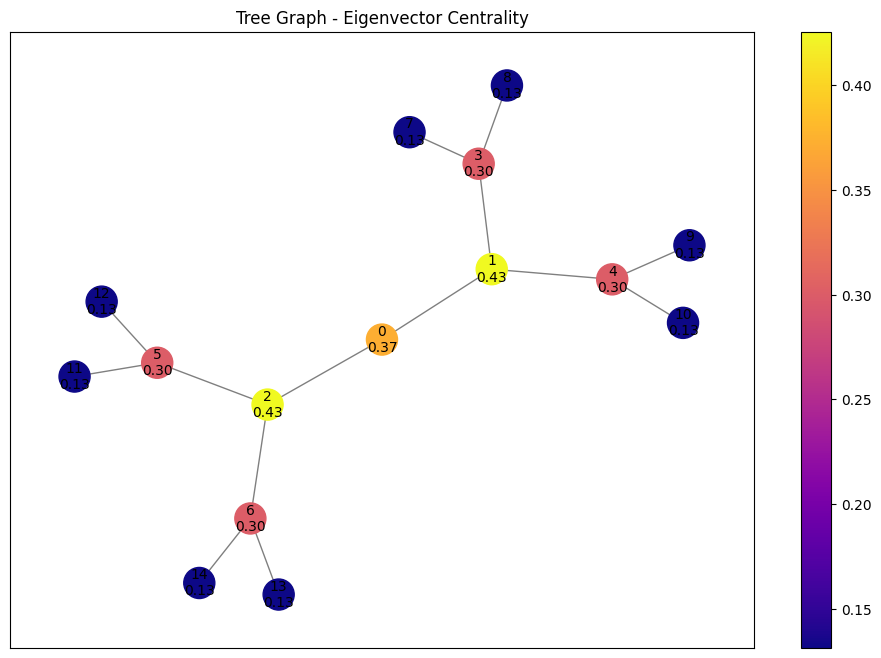

PageRank: {0: 0.06518634764341541, 1: 0.09738924094387749, 2: 0.09738924094387749, 3: 0.10532419386750566, 4: 0.10532419386750566, 5: 0.10532419386750566, 6: 0.10532419386750566, 7: 0.03984229937485085, 8: 0.03984229937485085, 9: 0.03984229937485085, 10: 0.03984229937485085, 11: 0.03984229937485085, 12: 0.03984229937485085, 13: 0.03984229937485085, 14: 0.03984229937485085}


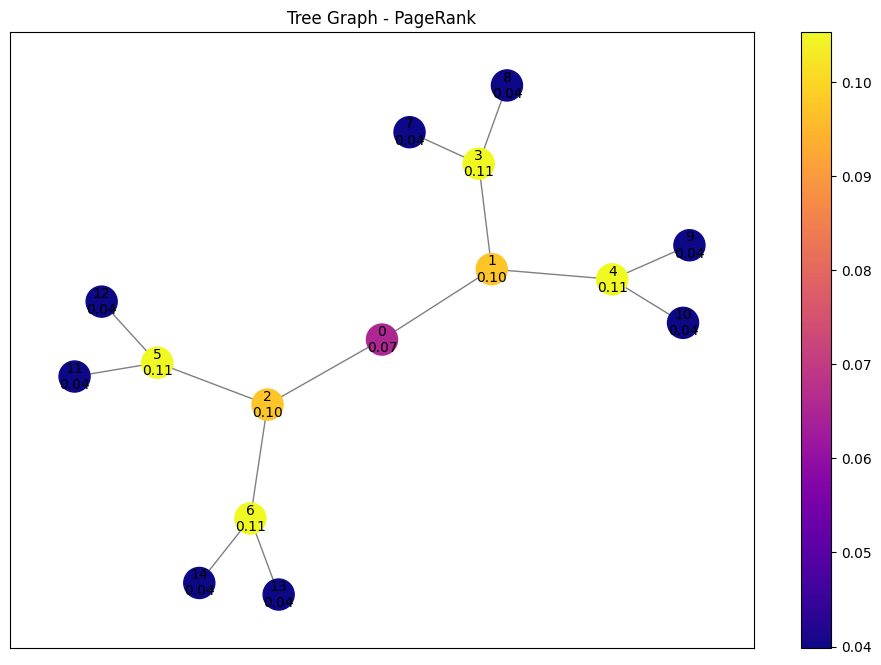

In [33]:
# Create and Analyze Graphs
graphs = create_graphs()
analyze_centralities(graphs)

# Types of Graphs for Centrality Analysis

## 1. Random Graph (Erdős–Rényi Model)
### Definition:
A **Random Graph** is a graph where each possible edge between nodes is included with a fixed probability $p$.

### Characteristics:
- **Random Connectivity**: No predictable pattern in the connections.
- Often used to study average properties of networks, like phase transitions in connectivity.

### Effect on Centralities:
- **Degree Centrality**: Follows a **binomial distribution** due to random edge assignments.
- **Betweenness Centrality**: Generally low because paths are uniformly distributed.
- **Closeness Centrality**: Varies significantly based on the component a node belongs to.
- **Eigenvector Centrality**: Typically uniform unless clusters form.
- **PageRank**: Similar to eigenvector centrality; randomness affects the ranking.

## 2. Scale-Free Graph (Barabási–Albert Model)
### Definition:
A **Scale-Free Graph** has a **power-law degree distribution**, meaning a few nodes (hubs) have many connections, while most have very few.

### Characteristics:
- **Highly Heterogeneous**: A small number of nodes are very well-connected.
- Preferential attachment: New nodes are more likely to connect to highly connected nodes.

### Effect on Centralities:
- **Degree Centrality**: Highly skewed; hubs dominate.
- **Betweenness Centrality**: High for hubs as they act as bridges.
- **Closeness Centrality**: Hubs are central; peripheral nodes have low values.
- **Eigenvector Centrality**: Hubs are crucial, connected to other influential nodes.
- **PageRank**: Similar to eigenvector; high rank for hubs.

## 3. Grid Graph
### Definition:
A **Grid Graph** is a regular lattice-like graph where nodes are arranged in a grid, each connected to its immediate neighbors.

### Characteristics:
- **High Regularity**: Every node (except boundaries) has the same number of connections.
- Often used to model physical systems or geographical areas.

### Effect on Centralities:
- **Degree Centrality**: Uniform except at boundaries.
- **Betweenness Centrality**: Higher for nodes on key paths connecting different parts of the grid.
- **Closeness Centrality**: Central nodes are closer to others; edges have lower values.
- **Eigenvector Centrality**: Not very distinct due to regular structure.
- **PageRank**: Uniform due to the regularity.

## 4. Small-World Graph (Watts-Strogatz Model)
### Definition:
A **Small-World Graph** has **high clustering** with **short path lengths**. It is generated by starting with a regular ring lattice and randomly rewiring some edges.

### Characteristics:
- **Short Average Path Lengths**.
- **High Clustering Coefficient**: Similar to real-world networks.

### Effect on Centralities:
- **Degree Centrality**: Varies depending on rewiring.
- **Betweenness Centrality**: Higher for nodes that serve as shortcuts.
- **Closeness Centrality**: High due to short path lengths.
- **Eigenvector Centrality**: Influential nodes are often those connected to key shortcuts.
- **PageRank**: Sensitive to clustering, favoring nodes with many incoming links.

## 5. Tree Graph
### Definition:
A **Tree Graph** is a hierarchical structure with no cycles. It starts from a root node and branches out.

### Characteristics:
- **No Cycles**: Simple hierarchical organization.
- Often used to represent organizational structures, family trees, or file systems.

### Effect on Centralities:
- **Degree Centrality**: Root has a high degree; leaves have low.
- **Betweenness Centrality**: High near the root due to bridging branches.
- **Closeness Centrality**: Higher near the root, lower in the leaves.
- **Eigenvector Centrality**: Root has higher values; sensitive to depth.
- **PageRank**: Root node may dominate due to hierarchical connections.

# Summary
Different centralities provide unique insights into a node's importance in different network structures:
- **Degree Centrality**: Focuses on the **number** of connections.
- **Betweenness Centrality**: Highlights nodes **crucial for communication**.
- **Closeness Centrality**: Identifies nodes with **efficient access**.
- **Eigenvector Centrality** and **PageRank**: Emphasize the **quality of connections**, favoring nodes linked to other influential nodes.

Understanding the structure of the graph is crucial when interpreting centralities, as each graph type exhibits unique centrality patterns.


# HITS (Hyperlink-Induced Topic Search) Algorithm

## What is HITS?
The **HITS algorithm** is a centrality measure used in network analysis, particularly in web search and link analysis. Developed by Jon Kleinberg in 1999, HITS is instrumental in understanding the structure of the web and other directed networks. Unlike other centrality measures, HITS assigns **two scores** to each node in a directed graph:

- **Authority Score**: Represents the quality of the content of a node.
- **Hub Score**: Represents the quality of a node as a source of information pointing to other nodes.

### Key Concepts:
- A page (node) is a **good authority** if it is linked to by good hubs.
- A page is a **good hub** if it links to good authorities.
  
In the context of web pages:
- A **hub** is a web page that points to many authoritative sources.
- An **authority** is a web page that is pointed to by many reliable hubs.

HITS recognizes that a page's importance can come from its role as a **reliable source** (authority) or as a **valuable pointer** to good sources (hub).

## How HITS Works
The HITS algorithm iteratively updates the authority and hub scores until they converge to stable values. These scores are calculated using a form of **matrix multiplication** that considers both incoming and outgoing links.

### Formalization
Let’s define the key concepts formally:

### Graph Structure:
- Consider a directed graph $G = (V, E)$, where:
  - $V$ is a set of nodes (web pages, for example).
  - $E$ is a set of directed edges (links between pages).
- Each node $v \in V$ has an associated **authority score** $a(v)$ and a **hub score** $h(v)$.

### Authority Score Update:
The authority score of a node $v$ is calculated based on the sum of the hub scores of the nodes that point to it:

$$
a(v) = \sum_{(u, v) \in E} h(u)
$$

Where:
- $a(v)$ is the authority score of node $v$.
- The sum is taken over all nodes $u$ that have edges pointing to $v$.
- Nodes that are linked to by good hubs receive higher authority scores.

### Hub Score Update:
The hub score of a node $v$ is calculated based on the sum of the authority scores of the nodes it points to:

$$
h(v) = \sum_{(v, u) \in E} a(u)
$$

Where:
- $h(v)$ is the hub score of node $v$.
- The sum is taken over all nodes $u$ that $v$ points to.
- Nodes that point to good authorities receive higher hub scores.

### Iterative Algorithm:
1. **Initialization**: Start with initial hub and authority scores for all nodes (e.g., set all scores to 1).
2. **Authority Update**: Update each node’s authority score based on the hub scores of incoming links.
3. **Hub Update**: Update each node’s hub score based on the authority scores of outgoing links.
4. **Normalization**: Normalize both authority and hub scores to prevent them from growing indefinitely (e.g., divide by the sum of all scores).
5. **Convergence Check**: Repeat steps 2-4 until the scores converge (i.e., the changes are below a set threshold).

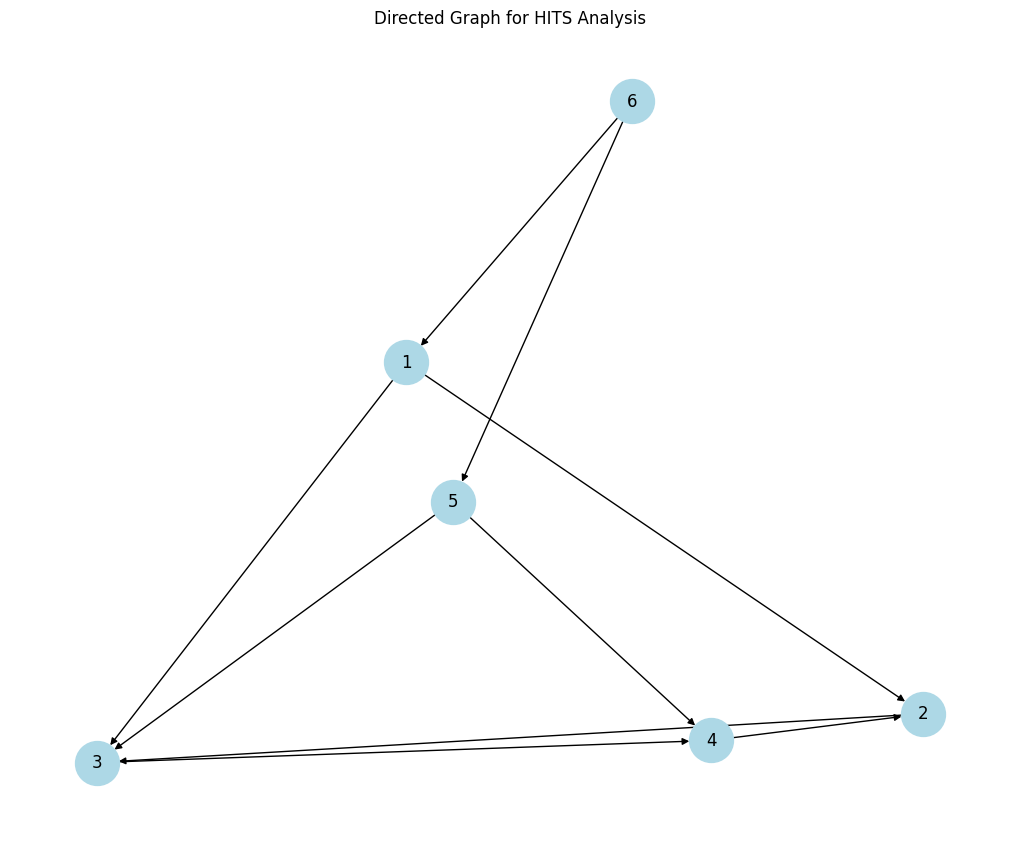

Hub Scores:
Node 1: 0.3000
Node 2: 0.2000
Node 3: 0.1000
Node 4: 0.1000
Node 5: 0.3000
Node 6: -0.0000

Authority Scores:
Node 1: 0.0000
Node 2: 0.2500
Node 3: 0.5000
Node 4: 0.2500
Node 5: -0.0000
Node 6: 0.0000


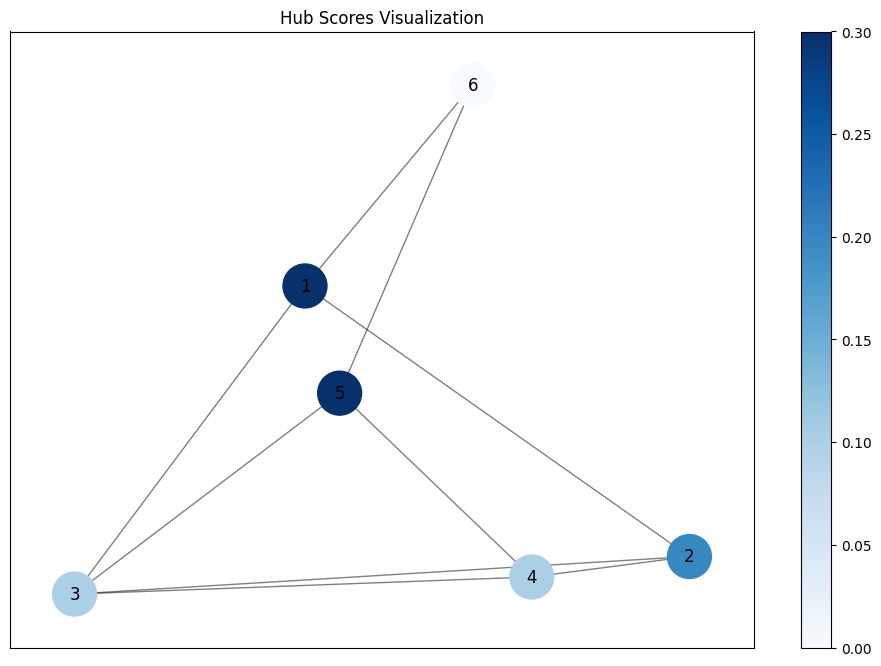

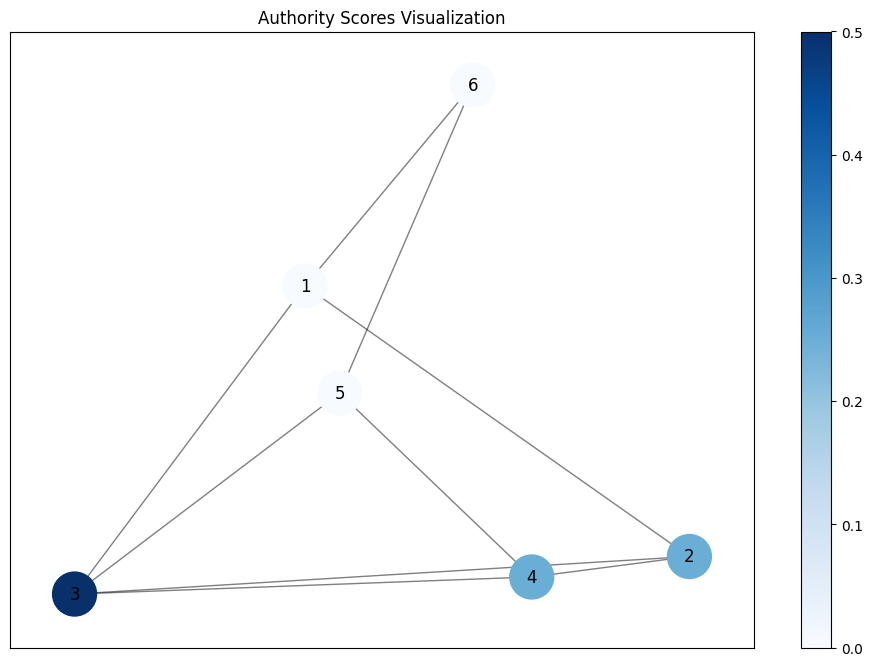

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph for demonstration
G = nx.DiGraph()

# Add edges (from -> to)
edges = [
    (1, 2), (1, 3), (2, 3), (3, 4), (4, 2), (5, 4), (5, 3), (6, 5), (6, 1)
]
G.add_edges_from(edges)

# Visualize the directed graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', arrows=True)
plt.title('Directed Graph for HITS Analysis')
plt.show()

# Compute HITS scores
hubs, authorities = nx.hits(G, max_iter=100, tol=1.0e-8)

# Display Hub Scores
print("Hub Scores:")
for node, score in hubs.items():
    print(f"Node {node}: {score:.4f}")

# Display Authority Scores
print("\nAuthority Scores:")
for node, score in authorities.items():
    print(f"Node {node}: {score:.4f}")

# Visualization of Hub and Authority Scores
def plot_hits_scores(G, scores, title):
    plt.figure(figsize=(12, 8))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=1000, cmap=plt.cm.Blues, 
                                   node_color=list(scores.values()), 
                                   nodelist=scores.keys())
    nx.draw_networkx_edges(G, pos, arrows=True, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=12)
    plt.colorbar(nodes)
    plt.title(title)
    plt.show()

# Plot Hub Scores
plot_hits_scores(G, hubs, 'Hub Scores Visualization')

# Plot Authority Scores
plot_hits_scores(G, authorities, 'Authority Scores Visualization')


## Comparison with Other Centralities

### **PageRank vs. HITS**:
- **PageRank**:
  - Assigns a single score to each page, representing its overall importance.
  - Focuses on the quantity and quality of **incoming links**, considering each link as a "vote" for the page's importance.
  - Does not differentiate between **hubs and authorities**.
  - Uses a **random walk model** with a damping factor to prevent getting stuck in cycles.
  
- **HITS**:
  - Differentiates between **hubs** (good pointers) and **authorities** (good sources).
  - Requires a **directed graph** and works best in contexts where both content quality and linking quality matter (like research papers or blogs).
  - Relies on **iterative updates** of hub and authority scores based on mutual reinforcement.

### **Eigenvector Centrality vs. HITS**:
- **Eigenvector Centrality**:
  - Measures the influence of a node based on the influence of its neighbors.
  - Similar to the **authority score** in HITS, as both consider the quality of neighbors.
  - Provides a single score, making it less complex than HITS.
  
- **HITS**:
  - Provides an additional dimension by distinguishing between **hubs and authorities**, making it more suitable for certain web analysis scenarios.
  - The authority score is analogous to eigenvector centrality, but it also includes a hub score, making the analysis more comprehensive.
  - Particularly useful for **bipartite relationships**, like identifying academic papers (authorities) and their citations (hubs).


### Result:
- Nodes with high authority scores are those that are pointed to by many good hubs.
- Nodes with high hub scores are those that point to many good authorities.

# Comparing the Performance of the Bron-Kerbosch Algorithm and its Pivoted Variant

## Objective

Implement both the simple version of the Bron-Kerbosch algorithm and its pivoted variant to identify maximal cliques in an undirected graph, and compare their performance in terms of execution time.

---

## Definitions and Formulation

### 1. Bron-Kerbosch Algorithm

The **Bron-Kerbosch algorithm** is a recursive backtracking algorithm used to find all **maximal cliques** in an undirected graph.

- A **clique** is a subset of vertices in which every pair of vertices is directly connected by an edge.
- A **maximal clique** is a clique that cannot be extended by including any additional adjacent vertices.

The algorithm explores all possible cliques through recursive expansion:
- It adds vertices to a potential clique and explores further, removing them once complete.
- It stops recursion when there are no potential new vertices to add.

### 2. Bron-Kerbosch Algorithm with Pivoting (Optimized Variant)

The **pivoted version** of the Bron-Kerbosch algorithm optimizes the search by introducing a **pivot vertex**. This approach reduces the number of recursive calls by focusing only on vertices that are likely to extend the current clique. The pivot vertex helps avoid redundant recursive paths, thus improving performance.

The steps are as follows:
- **Choose a pivot** vertex from the union of potential and excluded vertices.
- **Limit search** to vertices not connected to the pivot, as vertices connected to the pivot are less likely to form new maximal cliques with the current set.

---

## Algorithm Steps

### Simple Bron-Kerbosch Algorithm
1. Initialize sets:  
   - `R`: Set of vertices in the current clique.
   - `P`: Set of candidate vertices for potential inclusion in the clique.
   - `X`: Set of vertices already excluded from the clique.
2. For each vertex in `P`, recursively add it to `R`, remove it from `P`, and explore new potential cliques.
3. Terminate recursion and add `R` to the list of cliques if both `P` and `X` are empty.

### Bron-Kerbosch Algorithm with Pivoting
1. Choose a pivot vertex from `P ∪ X`.
2. For each vertex in `P` that is **not a neighbor of the pivot**:
   - Add it to `R`, remove it from `P`, and recursively explore potential cliques.
3. This reduces unnecessary recursive calls and improves efficiency.

---

## Performance Comparison and Metrics

To measure the performance difference between the two versions:
1. **Execution Time**: Measure the time taken by each algorithm to find all maximal cliques in the graph.
2. **Performance Gain**: Calculate the percentage improvement in execution time for the pivoted version compared to the simple version.

The **performance gain** can be calculated as:
$$
\text{Performance Gain (\%)} = \left( \frac{\text{Time (Simple)} - \text{Time (Pivoted)}}{\text{Time (Simple)}} \right) \times 100
$$


---

The graph was created using this matrix:

|   | 1 | 2 | 3 | 4 | 5 |
|---|---|---|---|---| ---
| 1 | 0 | 1 | 1 | 0 | 0 |
| 2 | 1 | 0 | 1 | 0 | 0 |
| 3 | 1 | 1 | 0 | 1 | 0 |
| 4 | 0 | 0 | 1 | 0 | 0 |
| 5 | 0 | 0 | 0 | 0 | 0 |

### Simple Bron-Kerbosch algorithm and the Bron-Kerbosch with Pivoting variant

In [10]:
import networkx as nx
import time
import matplotlib.pyplot as plt


# Define the graph 
graph = nx.Graph()
edges = [(1, 2), (1, 3), (2, 3), (3, 4)]  # defining the edges as per the example graph
graph.add_edges_from(edges)
graph.add_node(5)  # adding Node 5 as an isolated node


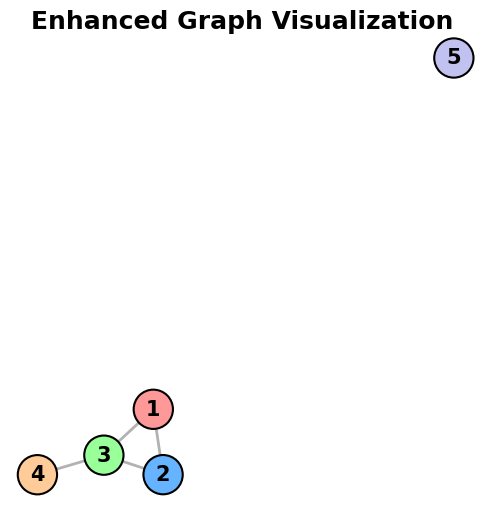

In [21]:
# Draw the graph with enhanced visuals
plt.figure(figsize=(6, 6))

# Adjust the spring layout with a smaller `k` value to bring nodes closer together
pos = nx.spring_layout(graph, seed=42, k=0.3)  # k controls the spacing between nodes

# Draw nodes with a gradient color
nx.draw_networkx_nodes(
    graph, pos, node_color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'],
    node_size=800, edgecolors='black', linewidths=1.5
)

# Draw edges with a uniform color and thicker lines
nx.draw_networkx_edges(graph, pos, edgelist=edges, width=2, alpha=0.6, edge_color='grey')

# Add labels with enhanced font size and bold weight
nx.draw_networkx_labels(
    graph, pos, font_size=15, font_color="black", font_weight="bold"
)

# Display the graph with a title and customized layout
plt.title("Enhanced Graph Visualization", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()

In [2]:
# Basic Bron-Kerbosch algorithm (Simple Version)
def bron_kerbosch_simple(R, P, X, cliques, graph):
    if not P and not X:
        cliques.append(R)
        return
    for vertex in list(P):
        bron_kerbosch_simple(
            R | {vertex}, 
            P & set(graph.neighbors(vertex)), 
            X & set(graph.neighbors(vertex)), 
            cliques, 
            graph
        )
        P.remove(vertex)
        X.add(vertex)


In [3]:
# Bron-Kerbosch with pivoting
def bron_kerbosch_with_pivot(R, P, X, cliques, graph):
    if not P and not X:
        cliques.append(R)
        return
    # Choose a pivot vertex
    pivot = next(iter(P | X))
    for vertex in P - set(graph.neighbors(pivot)):
        bron_kerbosch_with_pivot(
            R | {vertex}, 
            P & set(graph.neighbors(vertex)), 
            X & set(graph.neighbors(vertex)), 
            cliques, 
            graph
        )
        P.remove(vertex)
        X.add(vertex)

In [4]:
# Measure performance for the simple version
P = set(graph.nodes())
X = set()
cliques_simple = []
start_simple = time.time()
bron_kerbosch_simple(set(), P, X, cliques_simple, graph)
end_simple = time.time()
time_simple = end_simple - start_simple


In [5]:
# Measure performance for the pivoted version
P = set(graph.nodes())
X = set()
cliques_pivot = []
start_pivot = time.time()
bron_kerbosch_with_pivot(set(), P, X, cliques_pivot, graph)
end_pivot = time.time()
time_pivot = end_pivot - start_pivot


In [6]:
# Output performance comparison and cliques found

print(f"Simple Bron-Kerbosch time: {time_simple:.6f} seconds, Cliques found: {cliques_simple}")

Simple Bron-Kerbosch time: 0.000117 seconds, Cliques found: [{1, 2, 3}, {3, 4}, {5}]


In [7]:
print(f"Bron-Kerbosch with Pivoting time: {time_pivot:.6f} seconds, Cliques found: {cliques_pivot}")

Bron-Kerbosch with Pivoting time: 0.000114 seconds, Cliques found: [{1, 2, 3}, {3, 4}, {5}]


In [8]:
print(f"Performance gain: {((time_simple - time_pivot) / time_simple) * 100:.2f}% faster with pivoting")

Performance gain: 2.45% faster with pivoting


# Community Detection Analysis

## 1. Introduction

### Goal
Analyze and compare the **Louvain** and **Girvan-Newman** algorithms for community detection using Zachary's Karate Club graph.

### Objectives
1. Apply both algorithms to the graph.
2. Visualize the detected communities.
3. Evaluate the quality of communities using modularity.
4. Compare the performance of the algorithms.

---

## 2. Dataset: Zachary's Karate Club Graph

### Description
- A social network of 34 nodes and 78 edges.
- Nodes represent individuals, and edges represent friendships.
- The graph has a known community structure (two factions due to a real-world conflict).

---

## 3. Methodology

### 3.1 Algorithms

#### 3.1.1 Louvain Algorithm
- A modularity optimization-based algorithm.
- Groups nodes into communities by maximizing modularity.
- Works iteratively:
  1. Assign each node to its own community.
  2. Merge nodes into communities based on modularity gain.
  3. Repeat until no further improvement is possible.

#### 3.1.2 Girvan-Newman Algorithm
- A divisive approach that splits the graph into communities.
- Works iteratively:
  1. Compute edge betweenness for all edges.
  2. Remove the edge with the highest betweenness.
  3. Repeat until the graph is divided into distinct components.
  4. Evaluate communities at each stage.

---

## 4. Metrics

### 4.1 Modularity
- Measures the quality of a community structure by comparing the density of links inside communities to those between communities.
- Higher modularity indicates better community structure.


### Implementation

In [17]:
import networkx as nx
import community as community_louvain
from networkx.algorithms.community import girvan_newman
from networkx.algorithms.community.quality import modularity

import matplotlib.pyplot as plt
import time

# Load Zachary's Karate Club graph
G = nx.karate_club_graph()

In [18]:
def calculate_conductance(graph, community):
    """
    Calculate conductance for a single community.
    Conductance = (number of edges leaving the community) / (2 * internal edges + outgoing edges).
    """
    boundary_edges = nx.edge_boundary(graph, community)  # Edges crossing the community boundary
    internal_edges = graph.subgraph(community).size()  # Edges within the community
    total_boundary_edges = len(list(boundary_edges))
    
    if total_boundary_edges == 0:  # Prevent division by zero
        return 0

    return total_boundary_edges / (2 * internal_edges + total_boundary_edges)

def average_conductance(graph, communities):
    """
    Calculate the average conductance across multiple communities.
    """
    conductance_values = [calculate_conductance(graph, community) for community in communities]
    return sum(conductance_values) / len(conductance_values)


In [20]:
# Function to calculate runtime, modularity, and conductance
def evaluate_algorithm(graph, algorithm_func, algorithm_name):
    start_time = time.time()  # Start timer
    communities = algorithm_func(graph)  
    end_time = time.time()  # End timer
    runtime = end_time - start_time  
    
    # Convert communities to a list of sets if needed
    if isinstance(communities, dict):
        # Convert Louvain's dictionary output to a list of sets
        community_groups = {}
        for node, community_id in communities.items():
            community_groups.setdefault(community_id, []).append(node)
        communities = [set(group) for group in community_groups.values()]
    
    # Calculate modularity
    mod = modularity(graph, communities)

    # Calculate average conductance
    avg_conductance = average_conductance(graph, communities)

    # Print results
    print(f"{algorithm_name} Communities: {communities}")
    print(f"{algorithm_name} Modularity: {mod}")
    print(f"{algorithm_name} Average Conductance: {avg_conductance}")
    print(f"{algorithm_name} Runtime: {runtime:.4f} seconds\n")
    
    return communities, mod, avg_conductance, runtime


In [21]:
# Louvain Algorithm
def louvain_communities(graph):
    partition = community_louvain.best_partition(graph)
    communities = {}
    for node, comm_id in partition.items():
        communities.setdefault(comm_id, []).append(node)
    return list(communities.values())

In [22]:
# Girvan-Newman Algorithm
def girvan_newman_communities(graph):
    comp = girvan_newman(graph)
    return sorted(map(sorted, next(comp)))  # Take first split of the graph


In [23]:
# Function to plot communities
def plot_graph_with_communities(graph, communities, title):
    color_map = {}
    for i, community in enumerate(communities):
        for node in community:
            color_map[node] = i
    node_colors = [color_map[node] for node in graph.nodes()]
    plt.figure(figsize=(8, 6))
    nx.draw(
        graph,
        node_color=node_colors,
        with_labels=True,
        node_size=500,
        cmap=plt.cm.tab10,
    )
    plt.title(title)
    plt.show()

Evaluating Louvain Algorithm...
Louvain Communities: [[0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21], [4, 5, 6, 10, 16], [8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33], [24, 25, 28, 31]]
Louvain Modularity: 0.4438541256723075
Louvain Average Conductance: 0.2875
Louvain Runtime: 0.0064 seconds



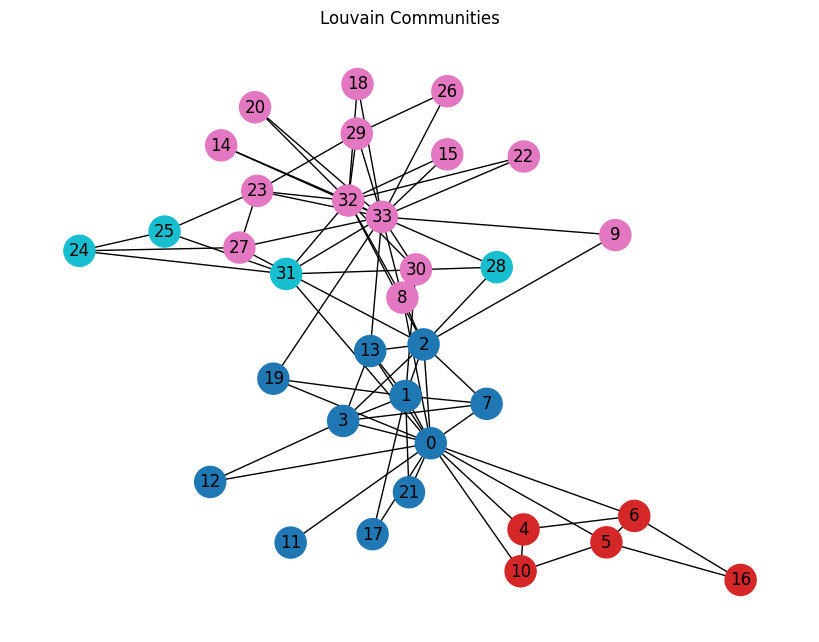

In [24]:
# Evaluate Louvain Algorithm
print("Evaluating Louvain Algorithm...")
louvain_results = evaluate_algorithm(G, louvain_communities, "Louvain")
plot_graph_with_communities(G, louvain_results[0], "Louvain Communities")


Evaluating Girvan-Newman Algorithm...
Girvan-Newman Communities: [[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
Girvan-Newman Modularity: 0.3476602762317048
Girvan-Newman Average Conductance: 0.13131313131313133
Girvan-Newman Runtime: 0.0400 seconds



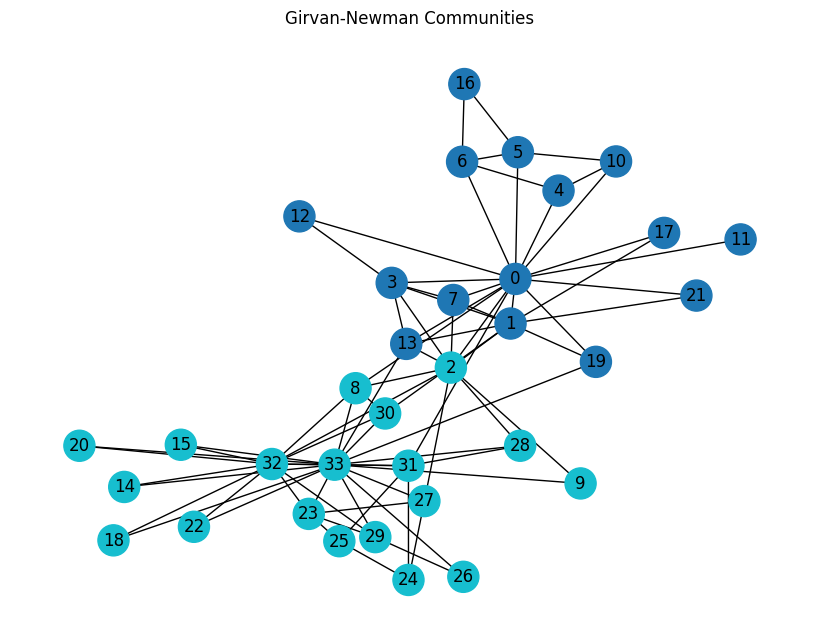

In [25]:
# Evaluate Girvan-Newman Algorithm
print("Evaluating Girvan-Newman Algorithm...")
girvan_newman_results = evaluate_algorithm(G, girvan_newman_communities, "Girvan-Newman")
plot_graph_with_communities(G, girvan_newman_results[0], "Girvan-Newman Communities")


Comparison of Algorithms:
       Algorithm  Modularity  Conductance  Runtime (seconds)
0        Louvain    0.443854     0.287500           0.006368
1  Girvan-Newman    0.347660     0.131313           0.040034


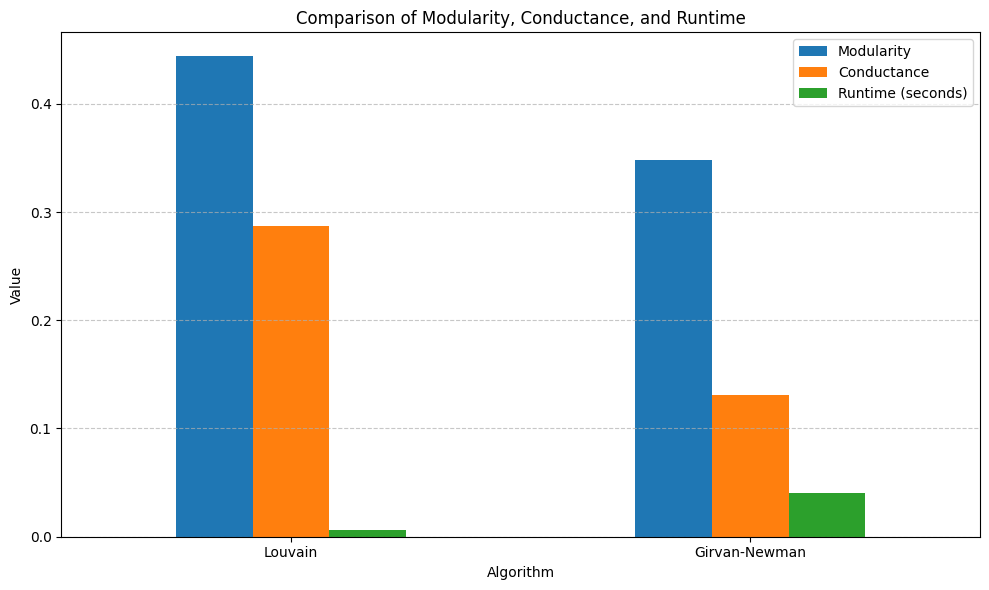

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare results for comparison
results_data = {
    "Algorithm": ["Louvain", "Girvan-Newman"],
    "Modularity": [louvain_results[1], girvan_newman_results[1]],
    "Conductance": [louvain_results[2], girvan_newman_results[2]],
    "Runtime (seconds)": [louvain_results[3], girvan_newman_results[3]]
}

# Convert results to a DataFrame
results_df = pd.DataFrame(results_data)

# Display the comparison table
print("\nComparison of Algorithms:")
print(results_df)

# Optional: Visualize as bar charts
results_df.set_index("Algorithm").plot(kind="bar", figsize=(10, 6))
plt.title("Comparison of Modularity, Conductance, and Runtime")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.legend(loc="best")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


### Interpretation in the Context of Zachary's Karate Club
#### Higher Conductance for Louvain:
- Louvain might detect multiple small communities, which have proportionally more edges leaving them.
#### Lower Conductance for Girvan-Newman:
- Girvan-Newman may identify two main communities with fewer boundary edges relative to internal ones.

# Results Overview

## Girvan-Newman Algorithm

- **Communities**: 2 large communities
  - **Community 1**: [0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]
  - **Community 2**: [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
- **Modularity**: 0.3477  
  Indicates that the detected communities are moderately well-separated but not highly modular.
- **Average Conductance**: 0.1313  
  Suggests that the communities are well-separated, with relatively few boundary edges compared to internal edges.
- **Runtime**: 0.040 seconds  
  Slower than Louvain due to the computational overhead of edge-betweenness calculations.

---

## Louvain Algorithm

- **Communities**: 4 smaller communities
  - **Community 1**: [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21]
  - **Community 2**: [4, 5, 6, 10, 16]
  - **Community 3**: [8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33]
  - **Community 4**: [24, 25, 28, 31]
- **Modularity**: 0.4439  
  Indicates better modularity, meaning the communities are more densely connected internally compared to random connections.
- **Average Conductance**: 0.2875  
  Higher conductance implies more boundary edges, suggesting less distinct community separations.
- **Runtime**: 0.0064 seconds  
  Faster than Girvan-Newman due to its greedy optimization approach.
